# Imports

In [1]:
import numpy as np
import pandas as pd
import joblib
import warnings

from resources.context import Context as c
from resources.featureengineering import FeatureEngineering
from resources.plotcreator import PlotCreator

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings(action='ignore')

# Data Load

In [3]:
df0 = pd.read_csv(c().data_raw_fld() / 'case_1_data.csv')

# 1.0. Data Description

## 1.1. Dict

In [4]:
pd.read_csv(c().data_proc_fld() / 'case_1_dict.csv')

,attribute,description
0,cod_anuncio,código do anúncio
1,cod_cliente,código do anunciante
2,cod_tipo_pessoa,"tipo de anunciante: PF=1, PJ=2"
3,prioridade,"prioridade do anúncio (1=alta, 2-média, 3-baixa)"
4,leads,tota de propostas recebidas
5,views,quantidade de visualizações no anúncio
6,cliques_telefone,quantidade de cliques no telefone anunciado
7,cod_marca_veiculo,código da marca do veículo
8,cod_modelo_veiculo,código do modelo veículo
9,cod_versao_veiculo,código da versão do veículo


## 1.2. Shape

In [5]:
df0.shape

(48665, 41)

## 1.3. Dtypes

In [6]:
df0.dtypes # no big mistake located, but some dtypes will be revised after data analysis

cod_anuncio                            int64
cod_cliente                            int64
cod_tipo_pessoa                        int64
prioridade                             int64
leads                                  int64
views                                  int64
cliques_telefone*                      int64
cod_marca_veiculo                      int64
cod_modelo_veiculo                     int64
cod_versao_veiculo                     int64
ano_modelo                             int64
cep_2dig                               int64
uf_cidade                             object
vlr_anuncio                          float64
qtd_fotos                              int64
km_veiculo                             int64
vlr_mercado                          float64
flg_unico_dono                         int64
flg_licenciado                         int64
flg_ipva_pago                        float64
flg_todas_revisoes_concessionaria    float64
flg_todas_revisoes_agenda_veiculo      int64
flg_garant

## 1.4. NAs

In [7]:
df0.isna().sum() # will be corrected after data analysis

cod_anuncio                             0
cod_cliente                             0
cod_tipo_pessoa                         0
prioridade                              0
leads                                   0
views                                   0
cliques_telefone*                       0
cod_marca_veiculo                       0
cod_modelo_veiculo                      0
cod_versao_veiculo                      0
ano_modelo                              0
cep_2dig                                0
uf_cidade                               0
vlr_anuncio                             0
qtd_fotos                               0
km_veiculo                              0
vlr_mercado                          6217
flg_unico_dono                          0
flg_licenciado                          0
flg_ipva_pago                         312
flg_todas_revisoes_concessionaria     312
flg_todas_revisoes_agenda_veiculo       0
flg_garantia_fabrica                  312
flg_blindado                      

## 1.5. Statistical Description

In [8]:
data_analysis = PlotCreator(df=df0)
data_analysis.statistical_description(saving_figloc=(c().reports_fld() / 'classification/statistical_description.png'))

[0809/125231.133792:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0809/125231.297463:INFO:headless_shell.cc(653)] Written to file /tmp/tmpvzqogmn9/temp.png.


,attributes,mean,median,std,min,max,range,skew,kurtosis
0,cod_anuncio,98293.33,98030.00,56500.69,2.00,195939.00,195937.00,-0.00,-1.20
1,cod_cliente,8804.72,6778.00,7954.61,1.00,38733.00,38732.00,1.91,3.42
2,cod_tipo_pessoa,1.85,2.00,0.36,1.00,2.00,1.00,-1.94,1.76
3,prioridade,2.60,3.00,0.77,1.00,3.00,2.00,-1.50,0.38
4,leads,4.42,1.00,11.96,0.00,364.00,364.00,9.78,168.52
5,views,446.33,196.00,1105.24,0.00,93608.00,93608.00,31.92,2135.42
6,cliques_telefone*,7.47,4.00,11.45,0.00,457.00,457.00,7.99,143.94
7,cod_marca_veiculo,19.28,5.00,37.63,-1.00,320.00,321.00,4.89,25.32
8,cod_modelo_veiculo,2063.22,2487.00,1112.00,-1.00,3695.00,3696.00,-0.03,-1.78
9,cod_versao_veiculo,342632.76,344132.00,13247.79,-1.00,347841.00,347842.00,-20.72,491.92


## 1.6. Analyzing Distortions

### leads (need to be transformed in 0 or 1)

In [9]:
# transforming in 0 or 1 for classification models
df0['leads'] = df0['leads'].apply(lambda x: 0 if x == 0 else 1)

### ano_modelo (It's strange to having -1 values, need to be corrected.)

In [10]:
df0['ano_modelo'].sort_values(ascending=True).unique()

array([  -1, 1951, 1952, 1958, 1959, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

### vlr_anuncio (No problem detected, values can be bigs or lower in real life)

In [11]:
df0['vlr_anuncio'].sort_values(ascending=False).head(60)

28985   405000000.00
17564   218500000.00
20971   195000000.00
15054   158000000.00
35988   122000000.00
45956   122000000.00
30300   113900000.00
36590   108000000.00
16924    90899000.00
47079    87000000.00
22959    82500000.00
41307    81500000.00
46372    81000000.00
45060    79000000.00
44185    74900000.00
47115    54000000.00
26527    53000000.00
16931    50900000.00
18623    49900000.00
22250    46000000.00
19207    45500000.00
36939    43000000.00
4594     42990000.00
33525    33000000.00
39756    29200000.00
34541    28000000.00
21986    27000000.00
22120    25000000.00
45731    18000000.00
940       8888888.00
29754     7100000.00
47085     3299000.00
35977     2860000.00
44616     2149000.00
41897     2149000.00
34163     1990000.00
45515     1990000.00
42544     1799000.00
41896     1590000.00
47943     1300000.00
2144      1290000.00
39844     1275000.00
43176     1250000.00
99        1235000.00
725       1230000.00
43996     1220000.00
11582     1200000.00
17768     116

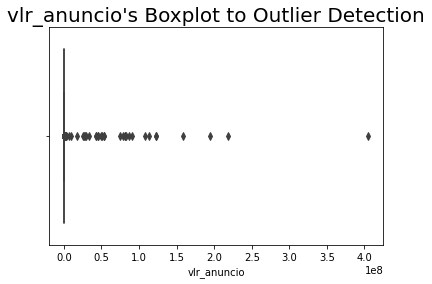

In [12]:
data_analysis.outlier_detector_boxplot(x='vlr_anuncio', saving_figloc=(c().reports_fld() / 'classification/vlr_anuncio_boxplot.jpg'))

### km_veiculo (No problem detected, values can be bigs or lower in real life)

In [13]:
df0['km_veiculo'].sort_values(ascending=False).head(60)

1473     2147483647
45076    2147483647
17649    1111111111
30366    1111111111
18267    1111111111
15409    1111111111
20907    1111111111
18270    1111111111
21120    1000000000
1371      999999999
93        999999999
30730     117800000
33932     111111111
11824     111111111
37251     101010101
4396       99999999
6          99999999
112        99999999
39100      34747878
39105      34747878
8155       34747878
8153       34747878
8152       34747878
8151       34747878
8150       34747878
8149       34747878
43084      23000000
14089      11111111
46511      11111111
13872      11111111
31706      11111111
387        10000000
6353       10000000
14511       9999999
39189       9999999
2852        6950000
24723       6666666
643         6200000
7711        1999622
39376       1320000
39469       1234567
9274        1171955
23005       1111111
38842       1111111
6471        1111111
38844       1111111
38854       1111111
7443        1111111
40156       1111111
30446       1111111


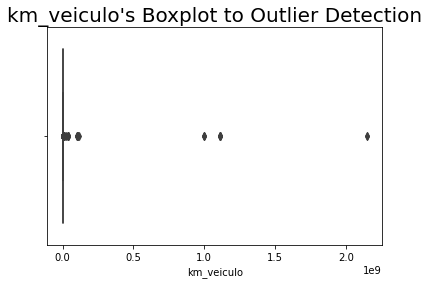

In [14]:
data_analysis.outlier_detector_boxplot(x='km_veiculo', saving_figloc=(c().reports_fld() / 'classification/km_veiculo_boxplot.jpg'))

### vlr_mercado (No problem detected, values can be bigs or lower in real life)

In [15]:
df0['vlr_mercado'].sort_values(ascending=False).head(60)

99      1111215.64
28070    921239.19
37850    852017.64
46617    692232.62
8706     686493.28
26840    682807.84
41540    641419.78
9643     637500.30
27801    629791.31
44310    623206.01
18527    595709.16
41498    594854.55
38218    577738.63
26908    517975.97
26928    516651.25
31301    516505.68
47460    516156.93
39613    513796.25
44613    512349.52
40389    508006.12
42839    506636.97
42824    502580.24
3061     502005.99
20967    501079.39
10824    499700.58
45505    499683.49
10564    490091.68
32582    484606.66
10017    484606.66
35120    481766.23
23326    481660.53
3720     477414.36
6958     473665.43
38293    472119.70
38642    469872.48
37380    469382.59
22020    467995.69
10117    464097.91
41453    461309.06
15841    461034.37
28793    448629.64
48354    447661.18
44938    446918.88
40271    443799.03
48547    439176.32
2813     433270.38
28888    431212.18
33994    430963.18
10699    430154.44
21534    428313.04
23527    428313.04
9001     427157.47
36959    426

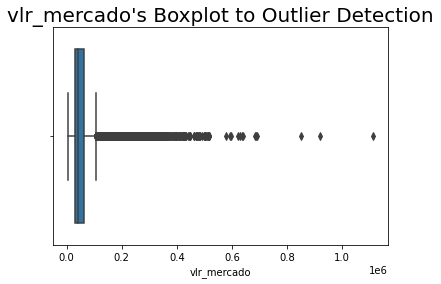

In [16]:
data_analysis.outlier_detector_boxplot(x='vlr_mercado', saving_figloc=(c().reports_fld() / 'classification/vlr_mercado_boxplot.jpg'))

### portas (No problem detected, values NA will be treated in next phases)

In [17]:
df0['portas'].sort_values(ascending=True).unique()

array([ 0.,  2.,  3.,  4., nan])

In [18]:
df0['portas'].isna().sum()

1

# 2.0. Feature Engineering

In [19]:
df1 = df0.copy()

## 2.1. Cleaning Dirty

In [20]:
dirty = ['cod_marca_veiculo', 'cod_modelo_veiculo', 'cod_versao_veiculo', 'ano_modelo']

for d in dirty:
    df1 = df1[df1[d] >= 0]

df1.shape # just two rows was deleted, then I will keep going!

(48663, 41)

## 2.2. Filtering NA (Dropped 'vlr_mercado', Other NAs are just 0,69% of rows are going to be lost, then I will just filter all NA to guarantee the integrity of data)

In [21]:
df1 = df1.drop('vlr_mercado', axis=1)

In [22]:
1 - (df1.dropna().shape[0]/df1.shape[0])

0.006575837905595572

In [23]:
df1.dropna().shape[0]

48343

In [24]:
df1.dropna(inplace=True)

In [25]:
# test_cols = ['cod_anuncio',
#             'cliques_telefone*',
#             'flg_unico_dono',
#             'flg_ipva_pago',
#             'flg_aceita_troca',
#             'views',
#             'cod_tipo_pessoa',
#             'prioridade',
#             'flg_blindado',
#             'flg_todas_revisoes_agenda_veiculo']

# df1[test_cols].sample(50).to_csv(c().data_proc_fld() / 'test_df.csv', index=False)

## 2.3. Separating Columns

In [26]:
cod_gran = 'cod_anuncio'

res_var = 'leads'

cat_list  = ['flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago', 
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica', 'flg_blindado', 
       'flg_aceita_troca', 'flg_adaptado_pcd', 'prioridade', 
       'combustivel', 'cambio', 'portas', 'alarme',
       'airbag', 'arquente', 'bancocouro','arcondic', 'abs', 'desembtras', 
       'travaeletr', 'vidroseletr', 'rodasliga', 'sensorchuva', 'sensorestacion',
       'cod_tipo_pessoa']
       
cont_list = ['views', 'cliques_telefone*', 'vlr_anuncio', 
       'qtd_fotos', 'km_veiculo']

special_cases_list = ['cod_cliente', 'cep_2dig', 'uf_cidade',
                     'cod_marca_veiculo', 'cod_modelo_veiculo', 'cod_versao_veiculo',
                     'ano_modelo']

## 2.4. Changing Dtypes

In [27]:
df1 = df1[df1[cod_gran] >= 0]
df1[cod_gran] = df1[cod_gran].astype(str)
df1[special_cases_list] = df1[special_cases_list].astype(str)
df1[cat_list] = df1[cat_list].astype(str)
df1[cont_list] = df1[cont_list].astype(float)

## 2.5. Derivating New Variables

In [28]:
feat_eng = FeatureEngineering(df=df1)
df1['uf'] = feat_eng.uf()
df1['decade'] = feat_eng.decade()
df1['ipva_dono'] = feat_eng.ipva_dono()
df1['sensors'] = feat_eng.sensors()
df1['eletr_car'] = feat_eng.eletr_car()
df1['best_offer'] = feat_eng.best_offer()

In [29]:
cat_list.append('uf')
cat_list.append('decade')
cat_list.append('ipva_dono')
cat_list.append('sensors')
cat_list.append('eletr_car')
cont_list.append('best_offer')

# 3.0. Data Analysis

## 3.1. Continuous Variables

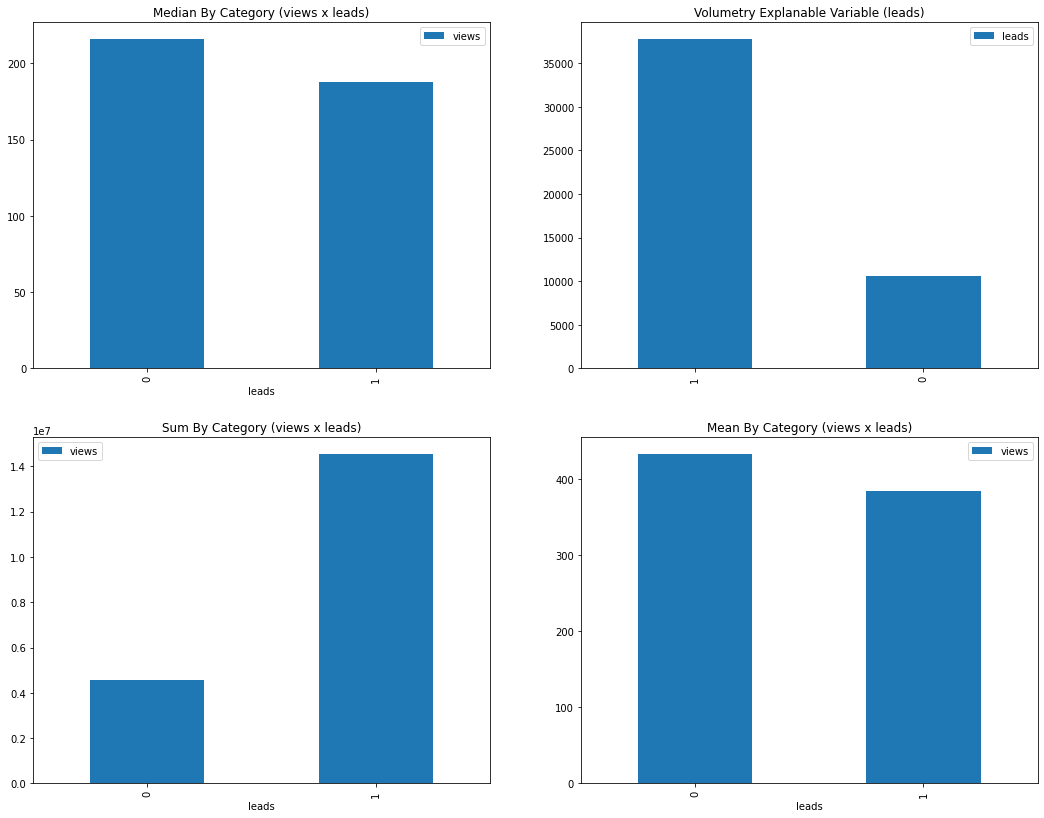

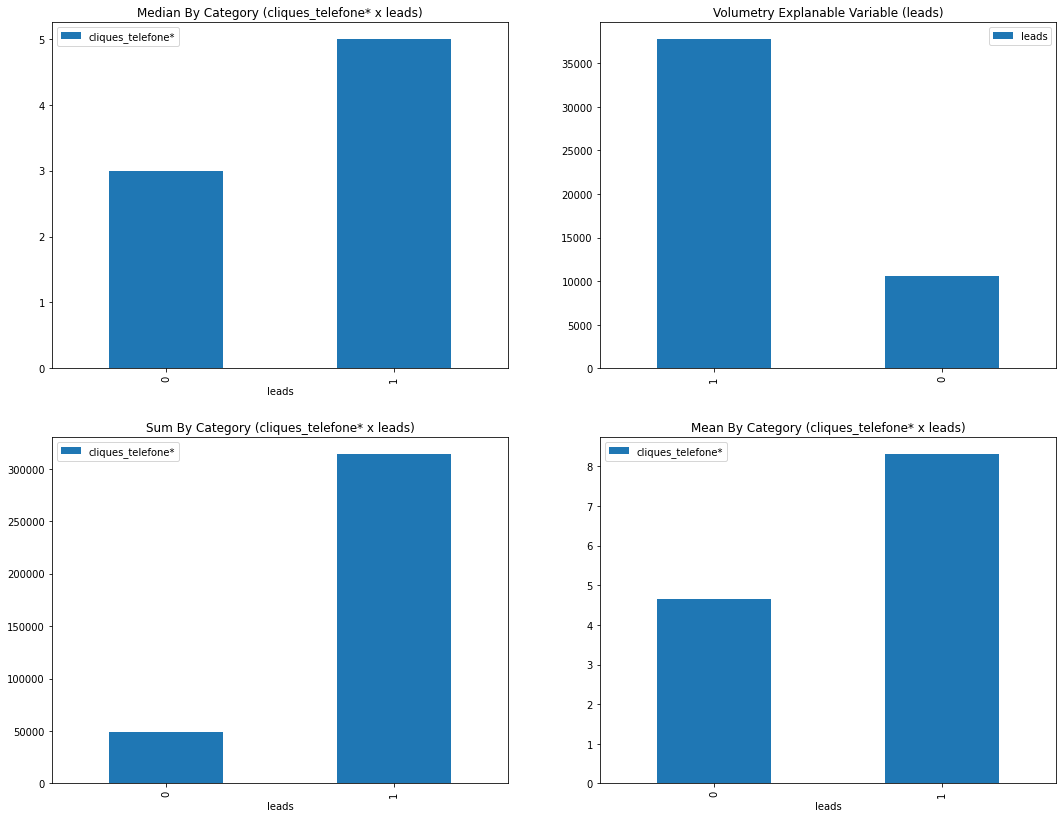

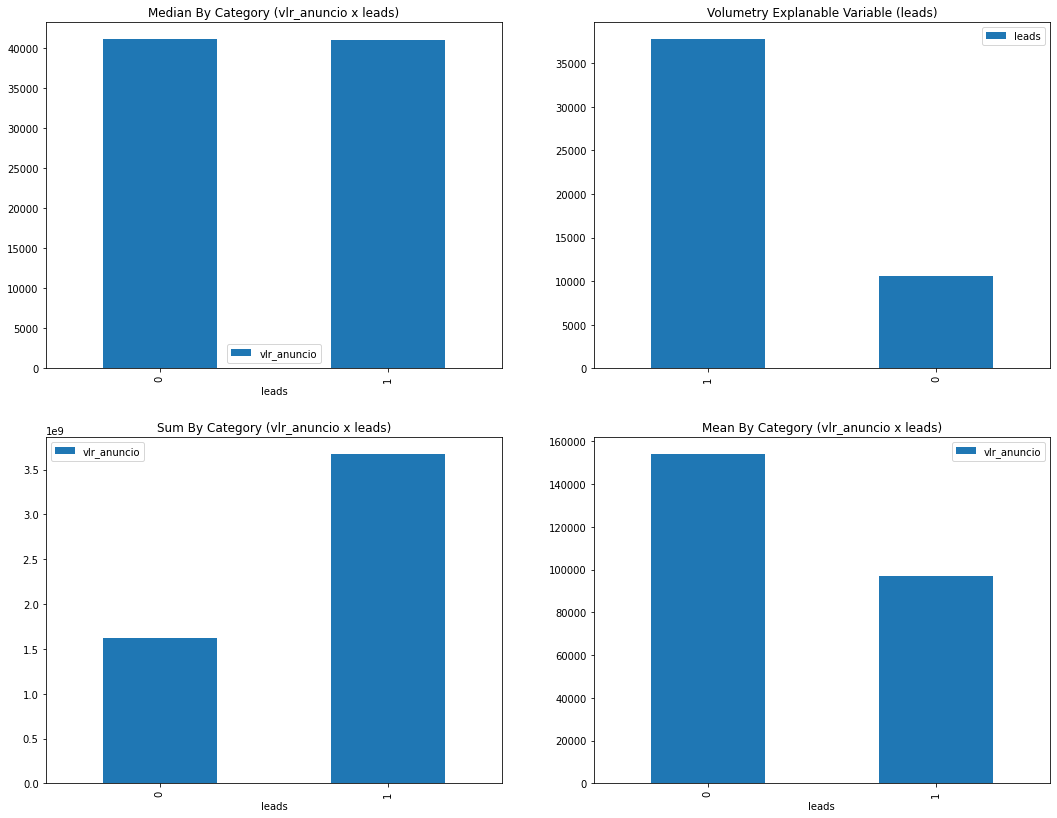

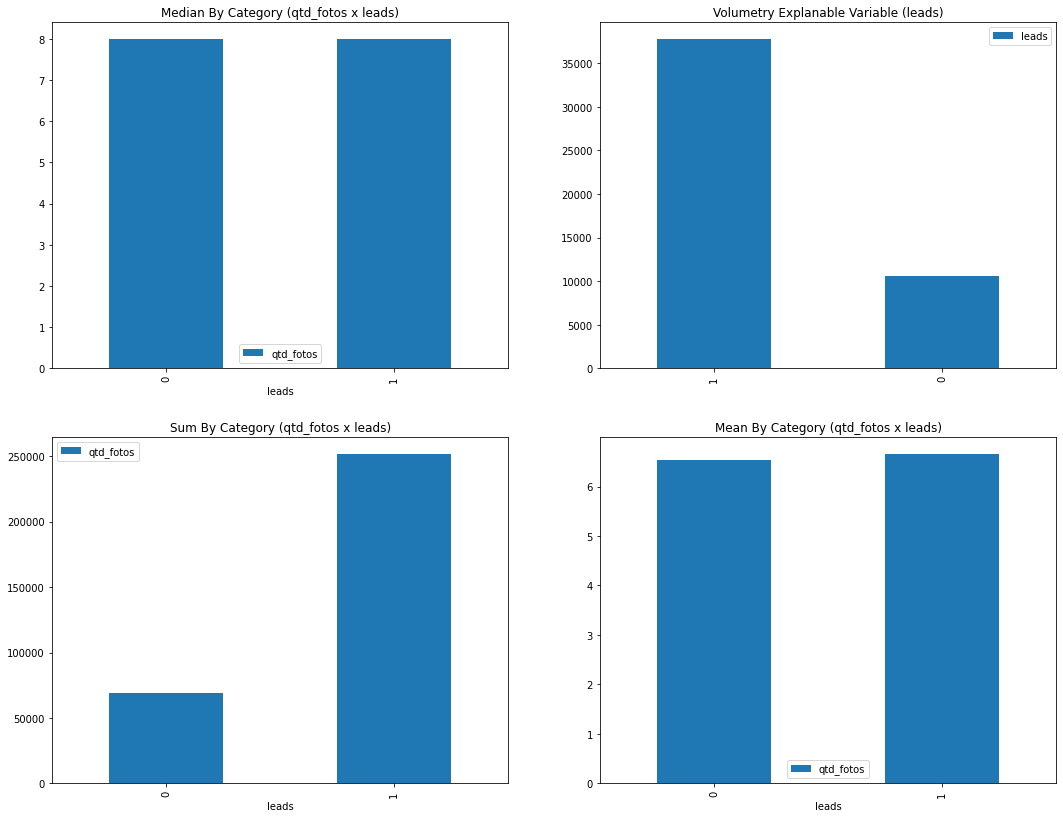

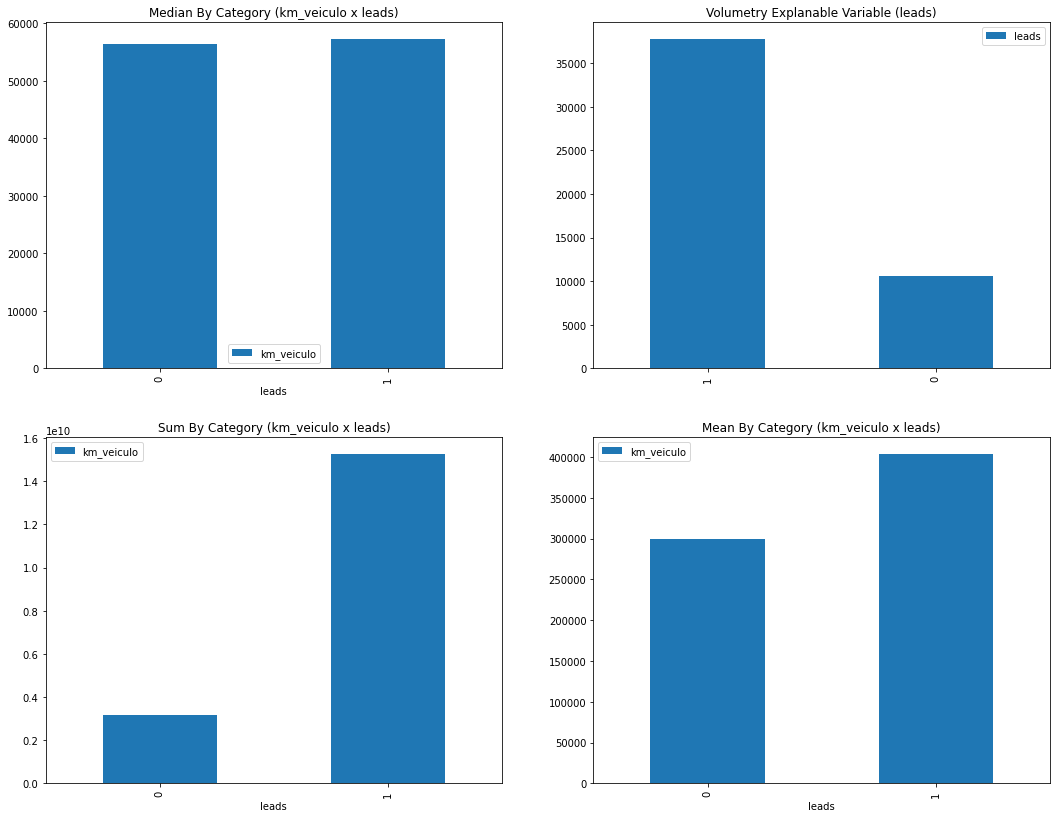

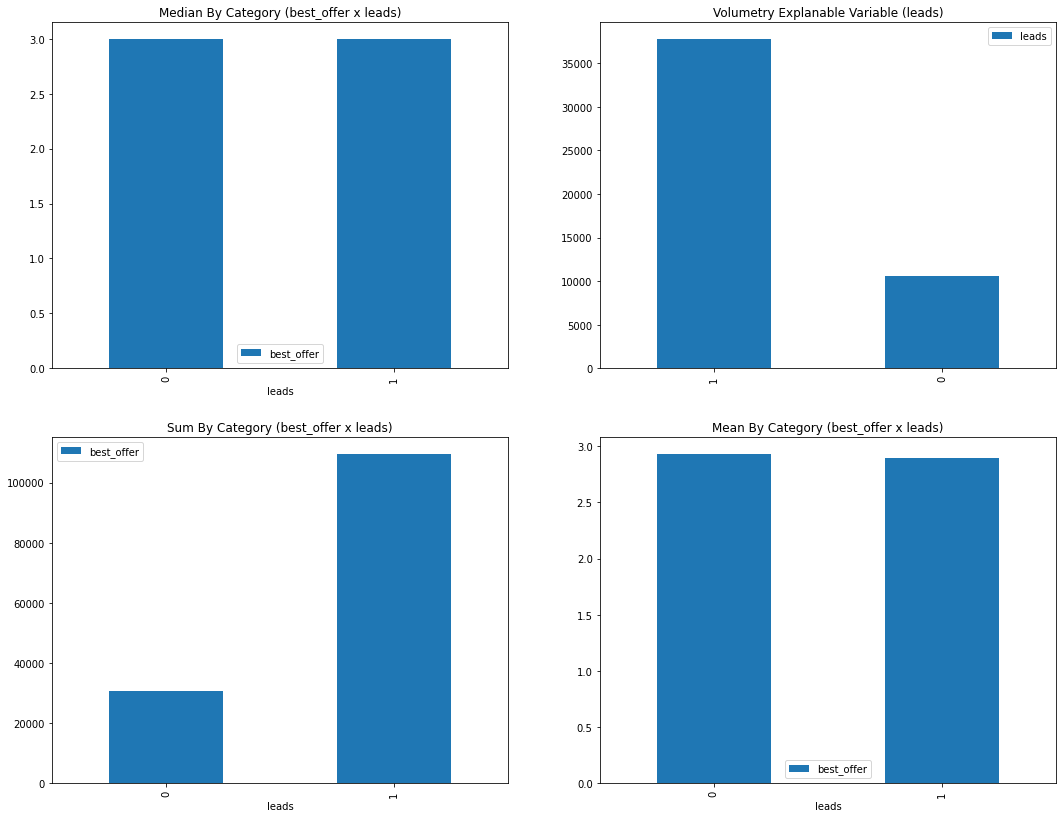

In [30]:
dataanalysis = PlotCreator(df=df1)

for expl_var in cont_list:
    saving_figloc=(c().reports_fld() / f'classification/{expl_var}_cont_eda.jpg')
    dataanalysis.plot_cat_analy(df=df1, expl_var='leads', res_var=expl_var, categorical=True, saving_figloc=saving_figloc)

## 3.2. Categorical Variables

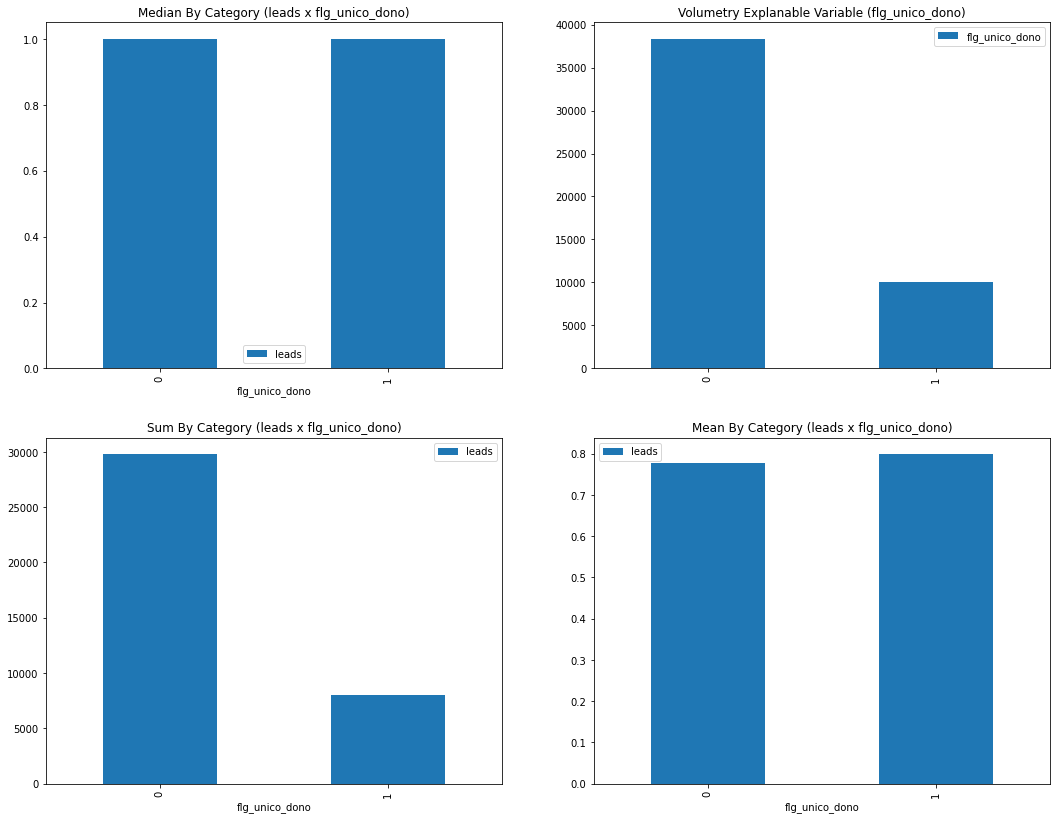

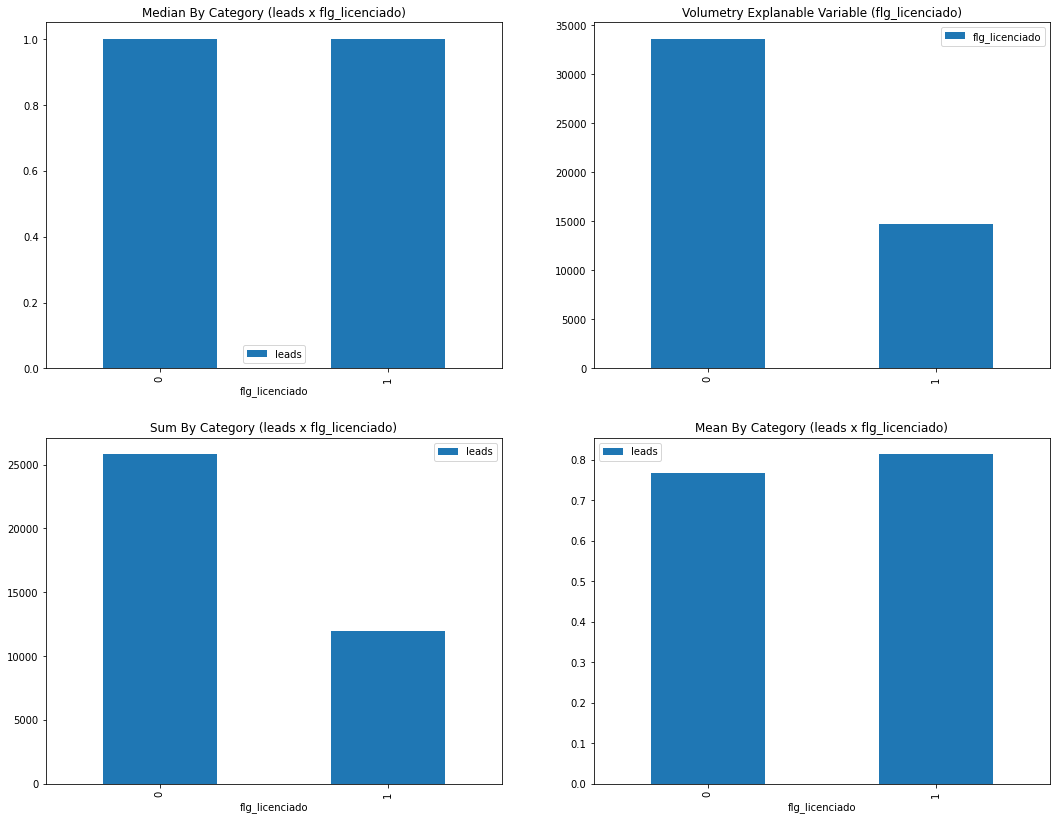

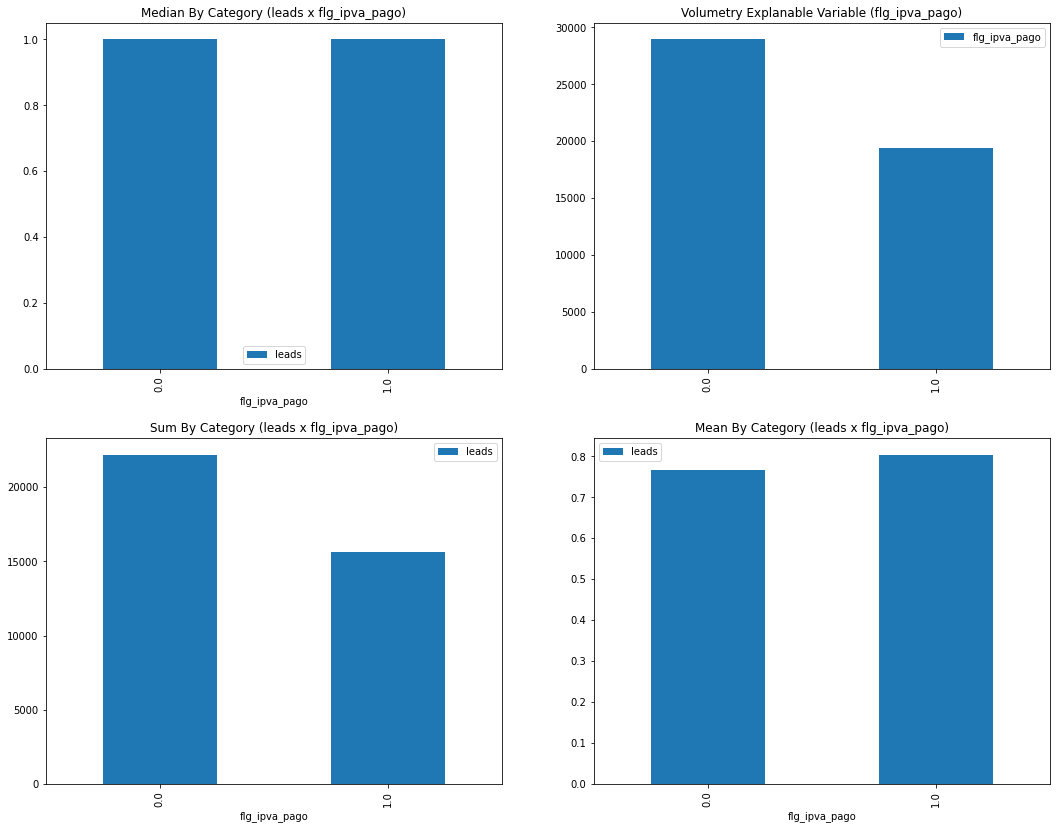

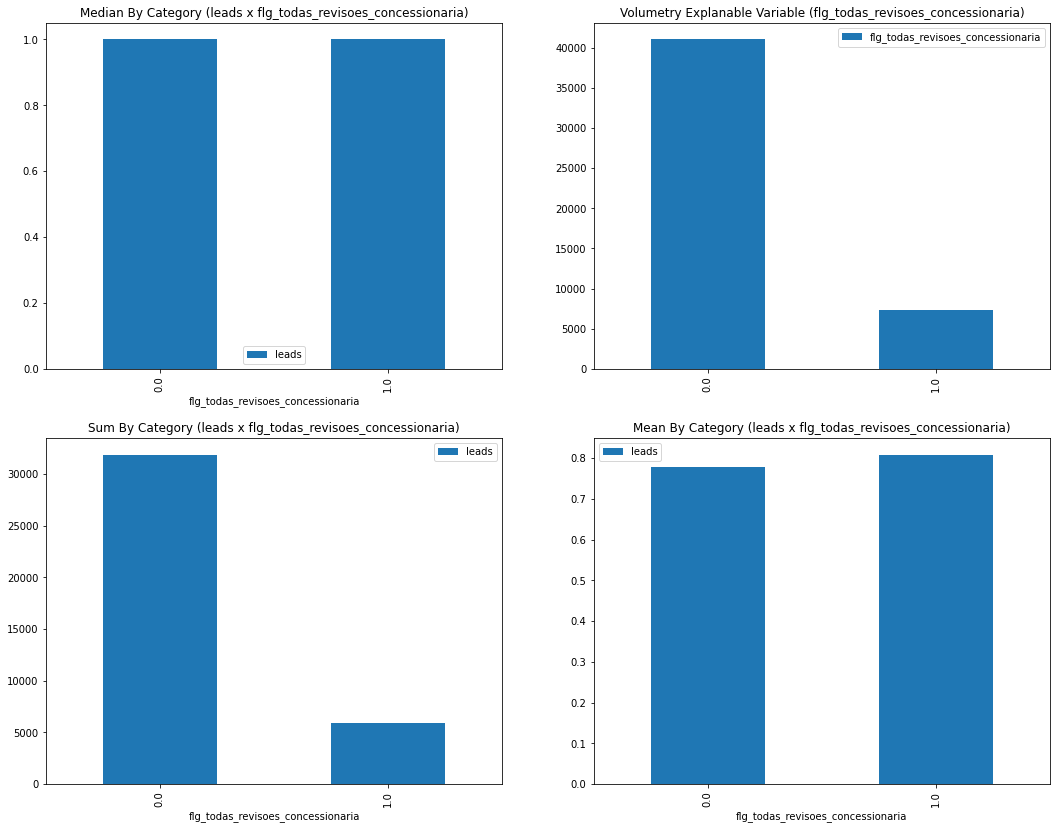

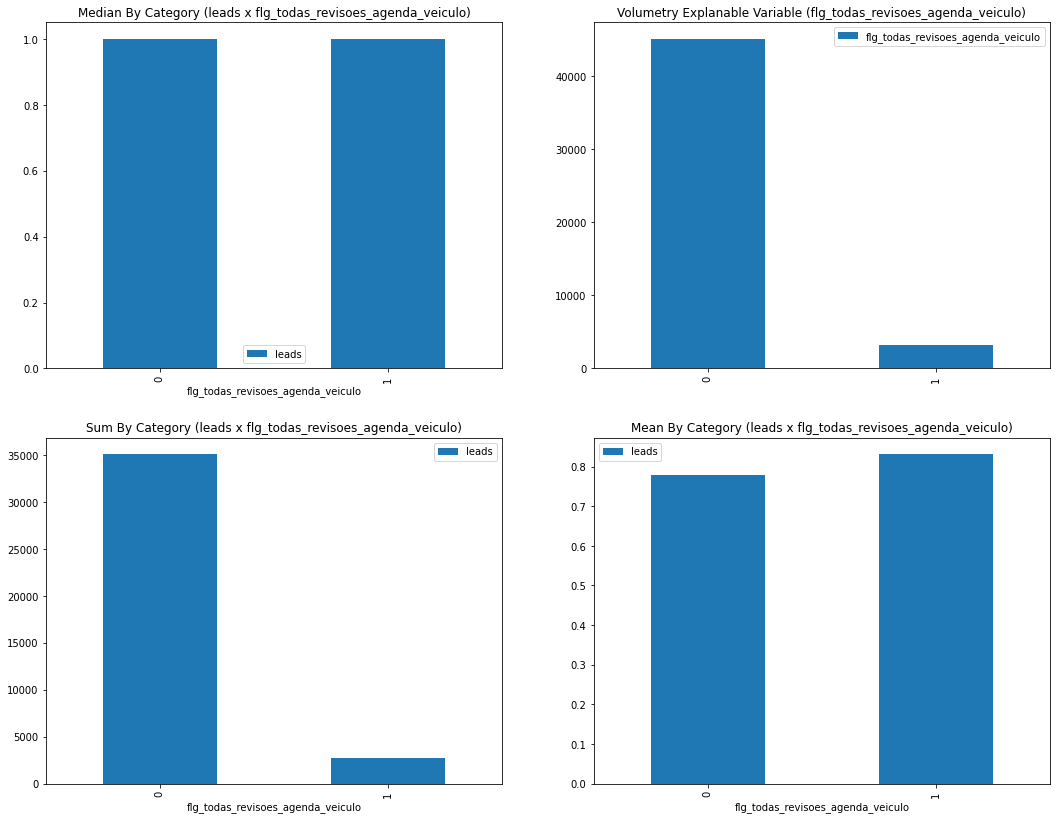

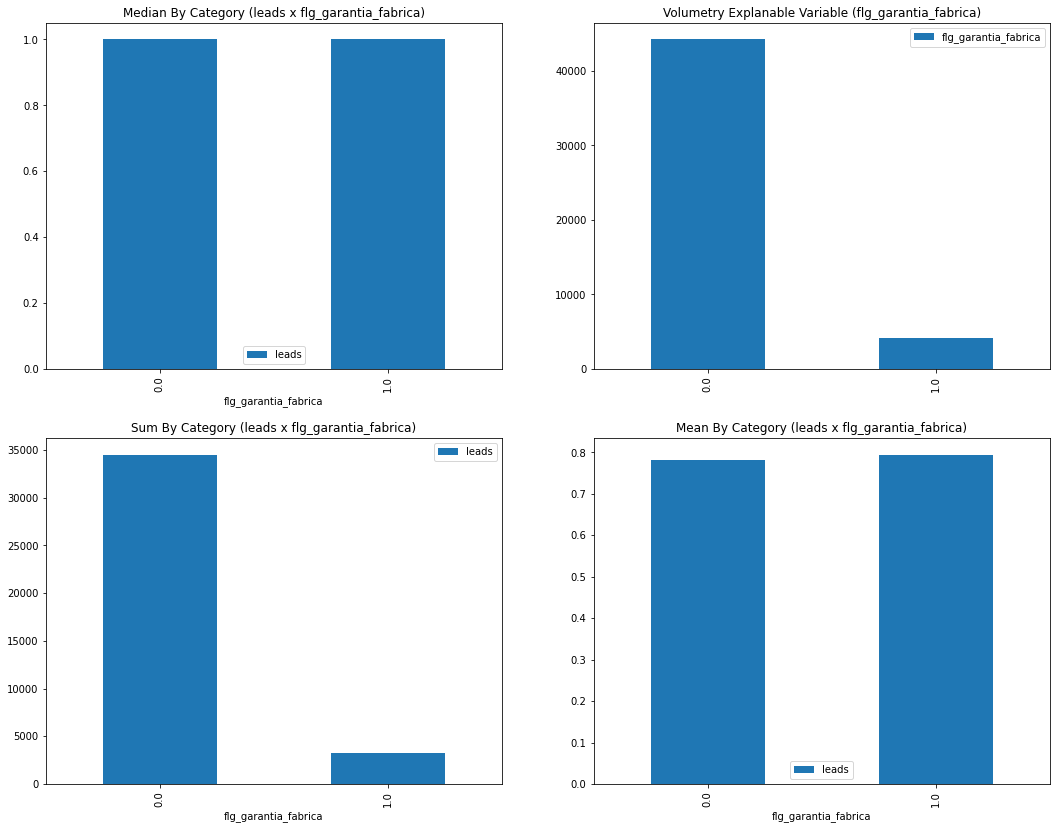

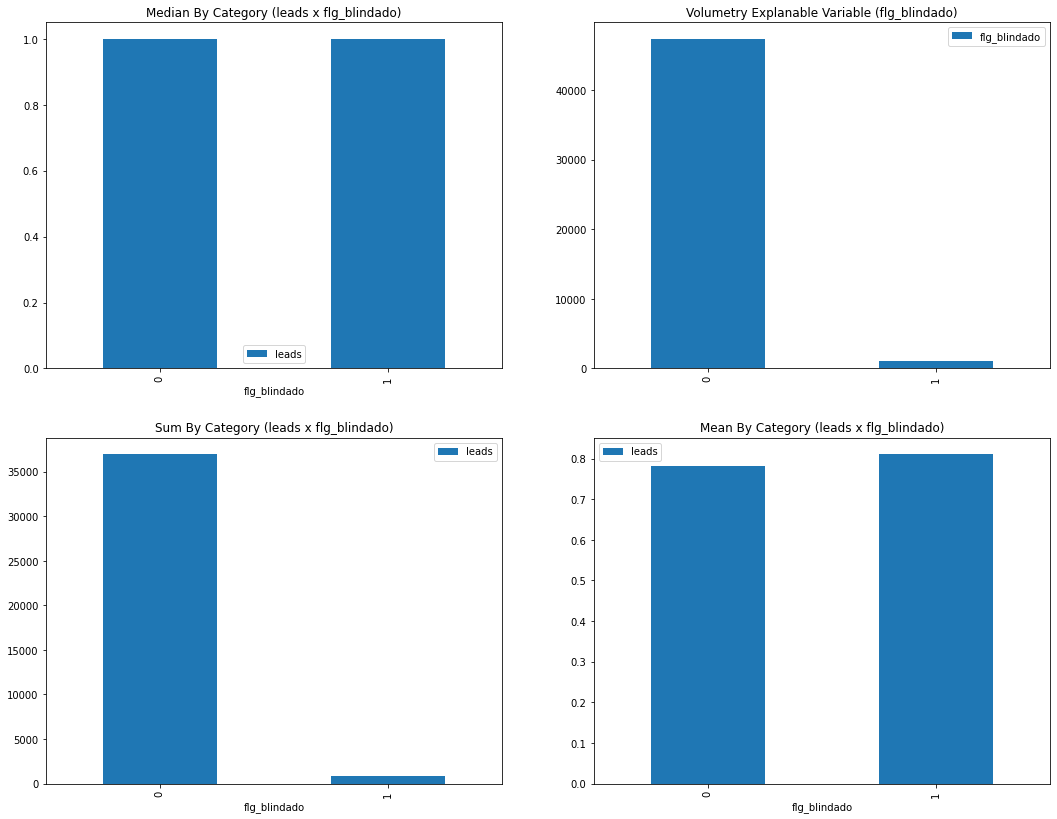

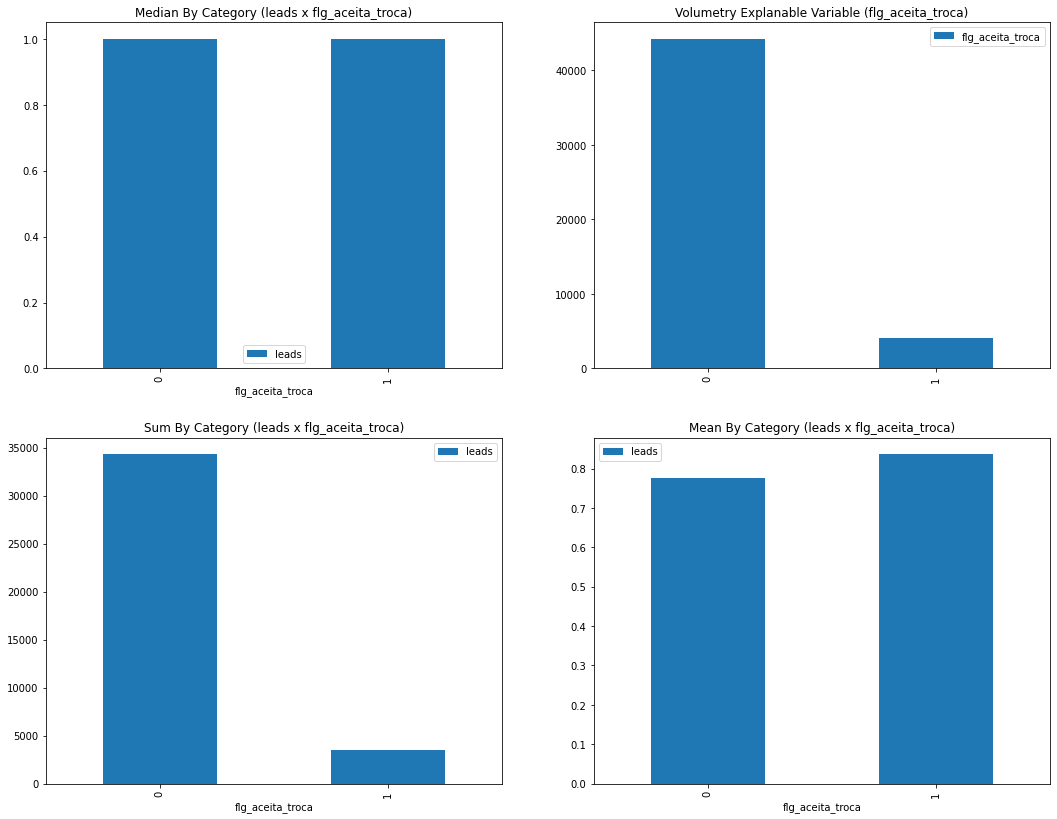

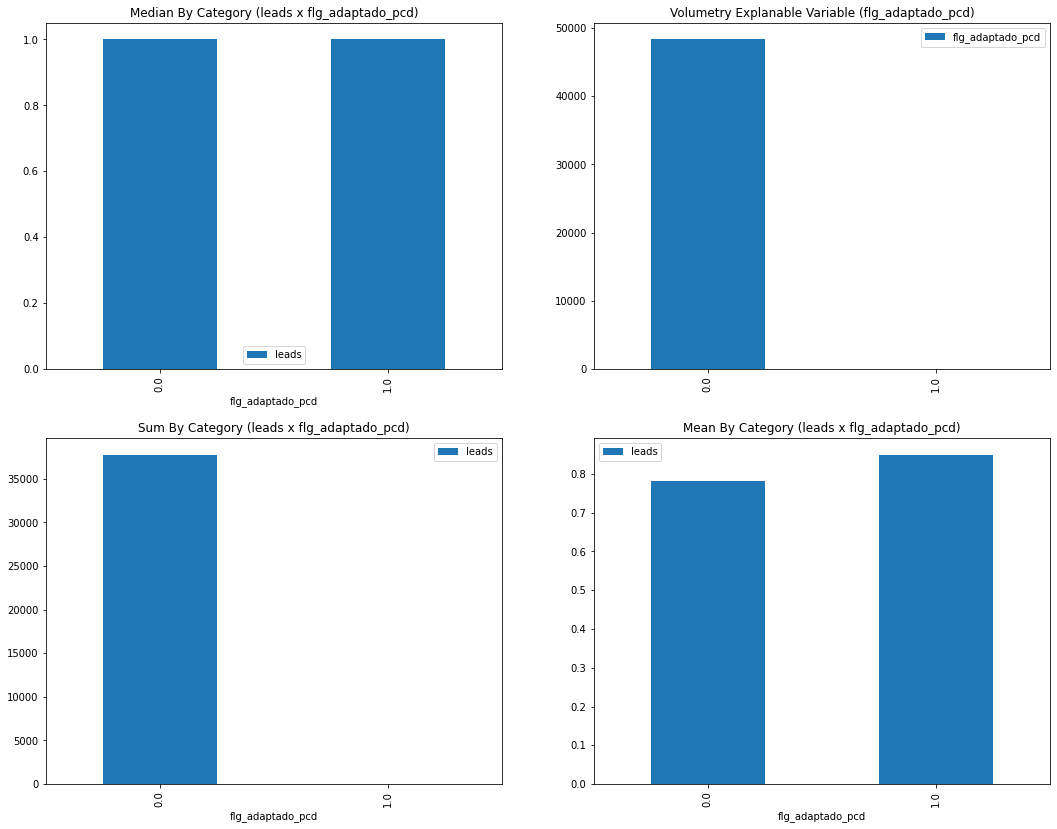

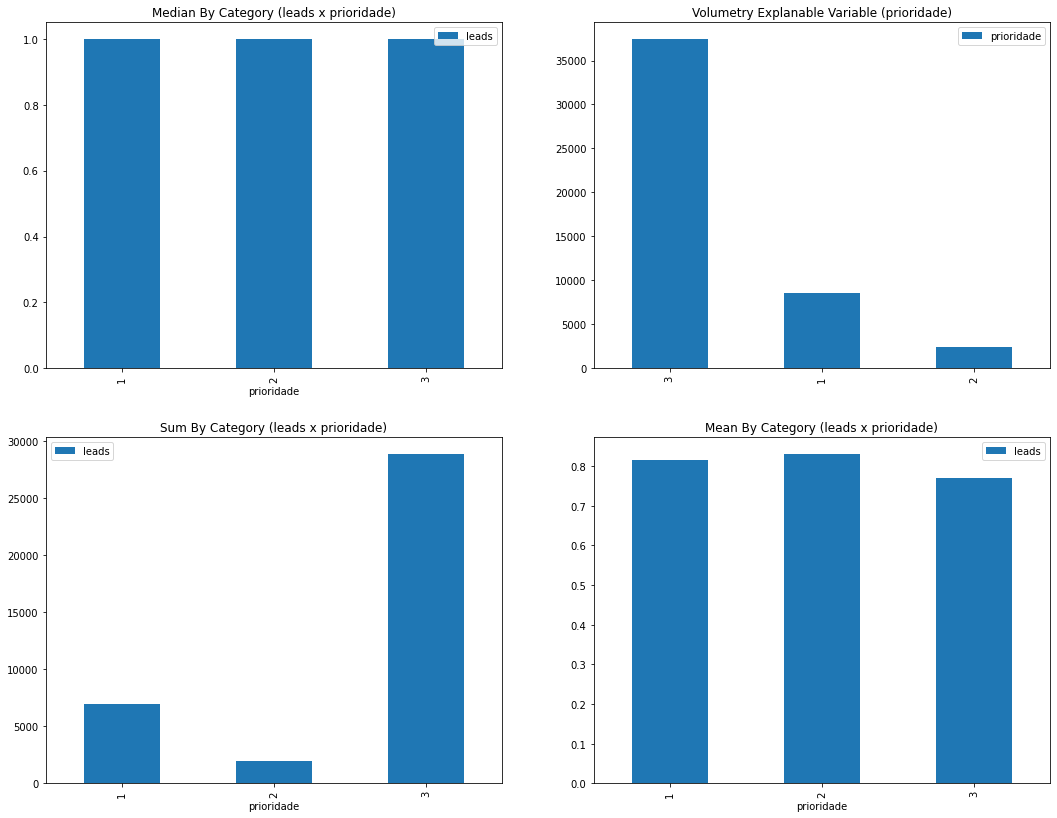

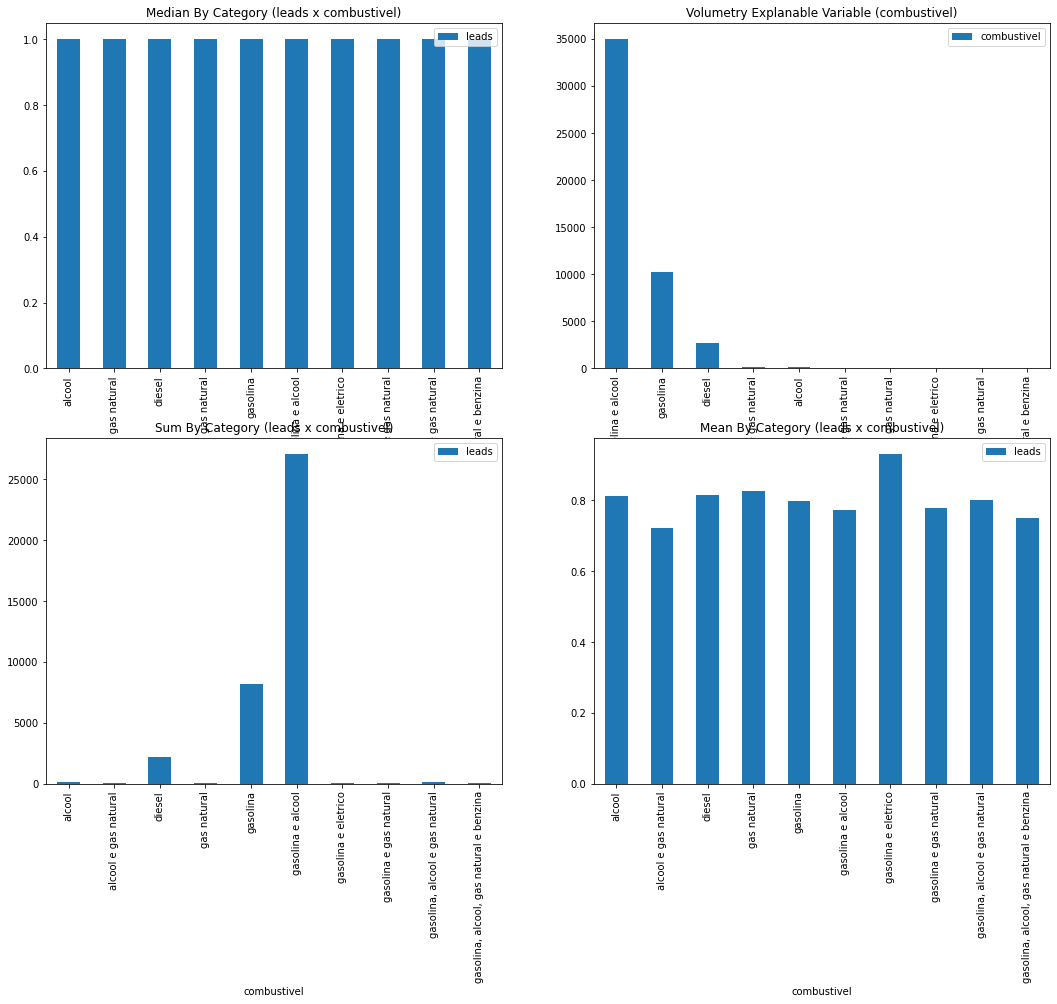

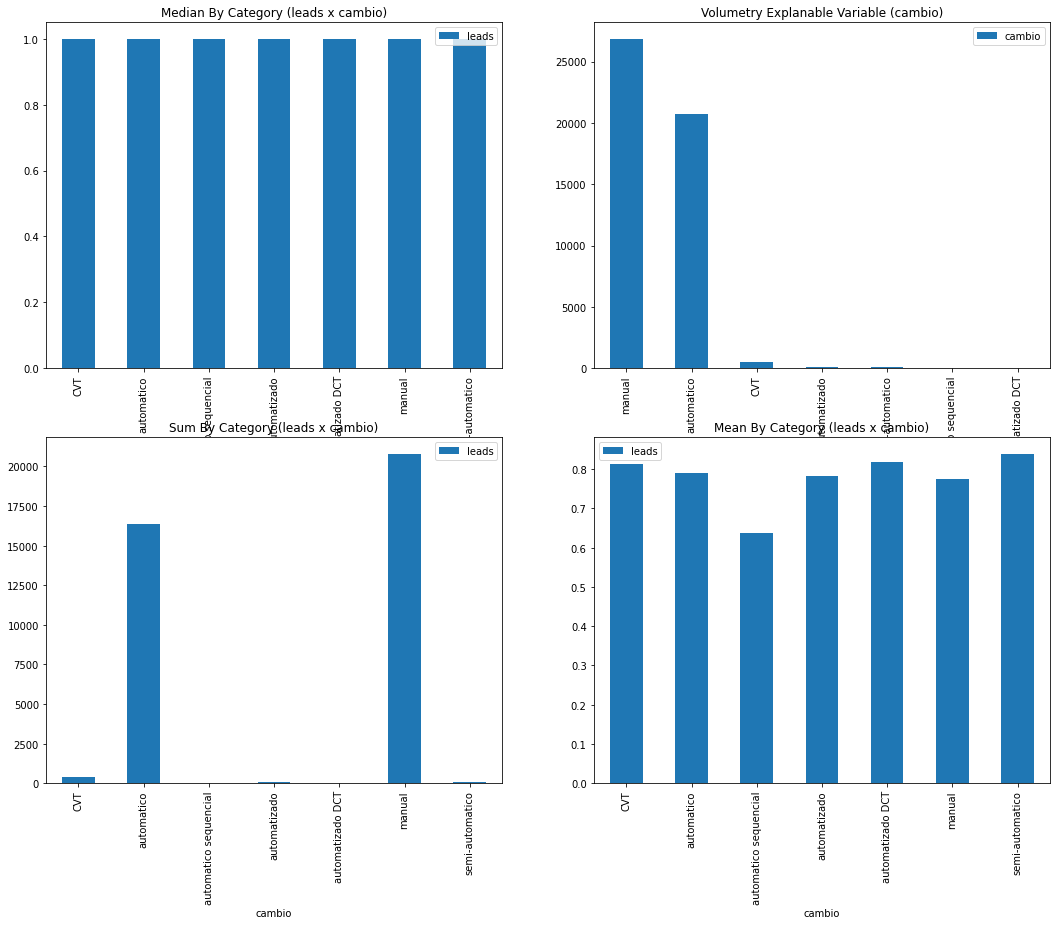

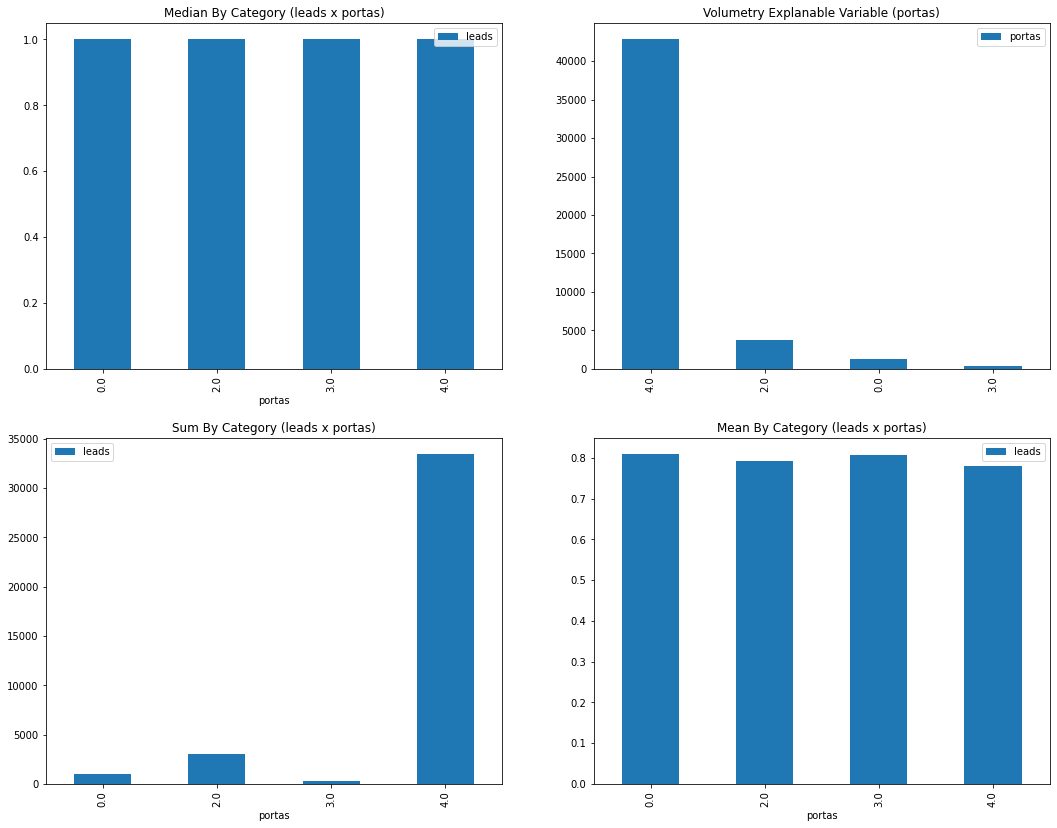

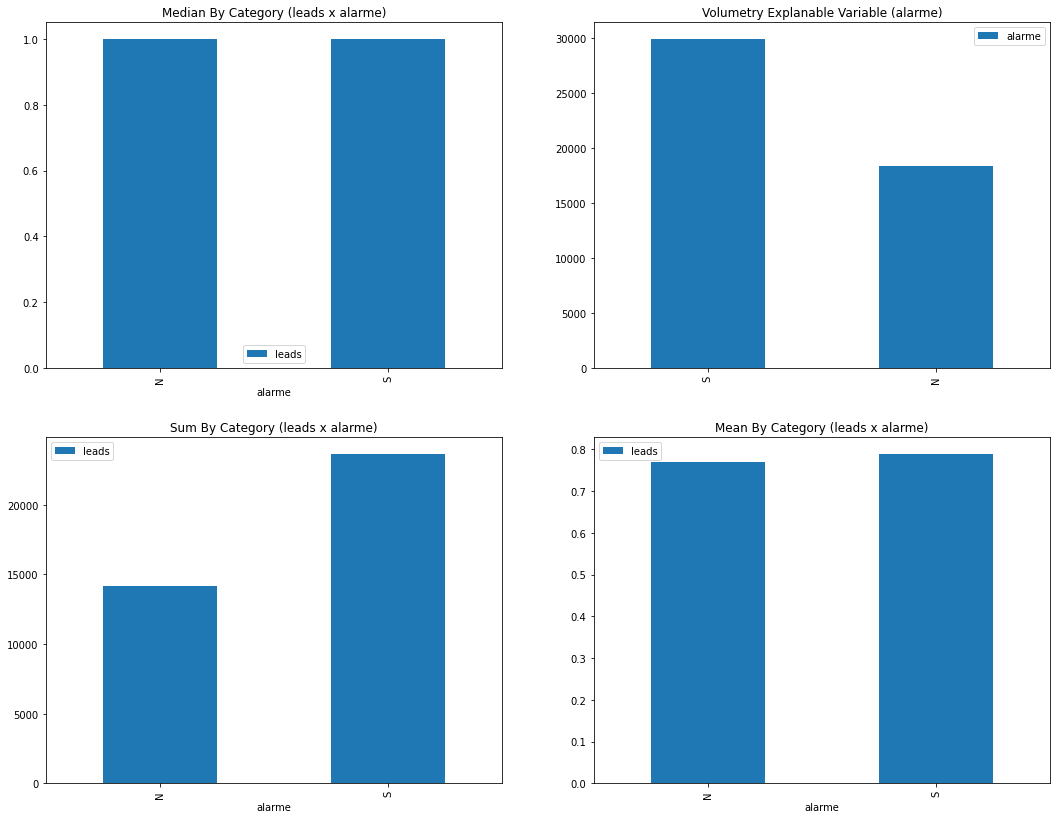

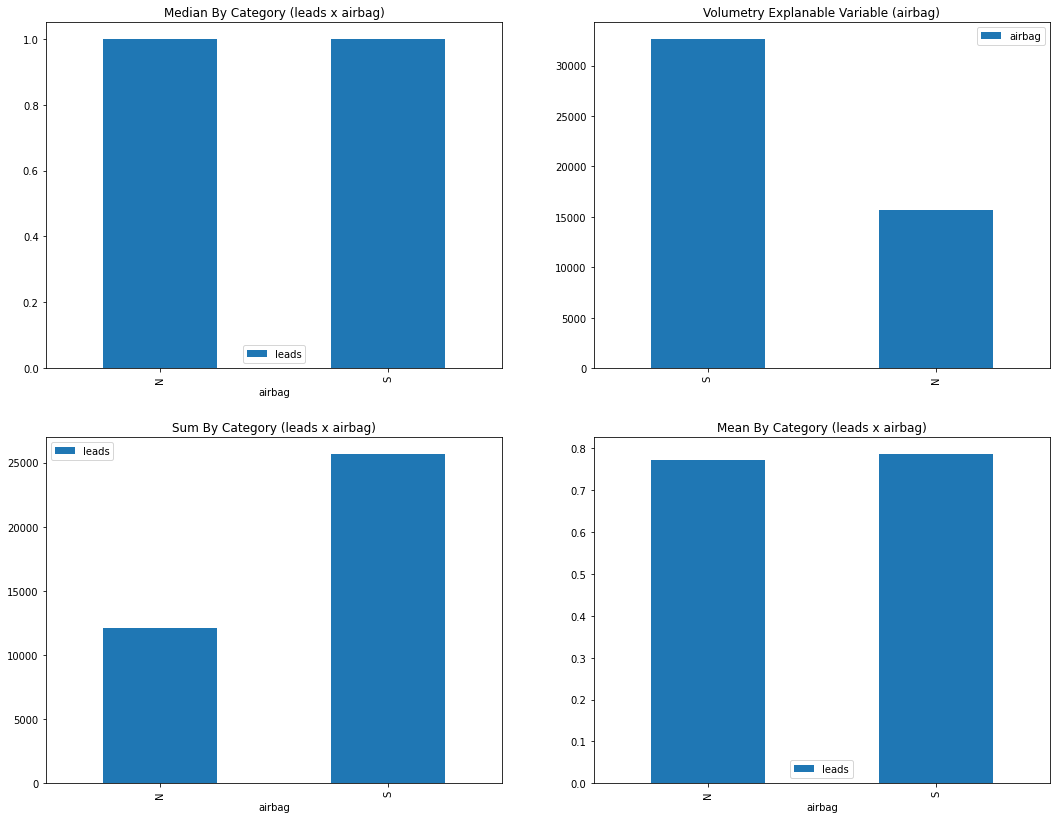

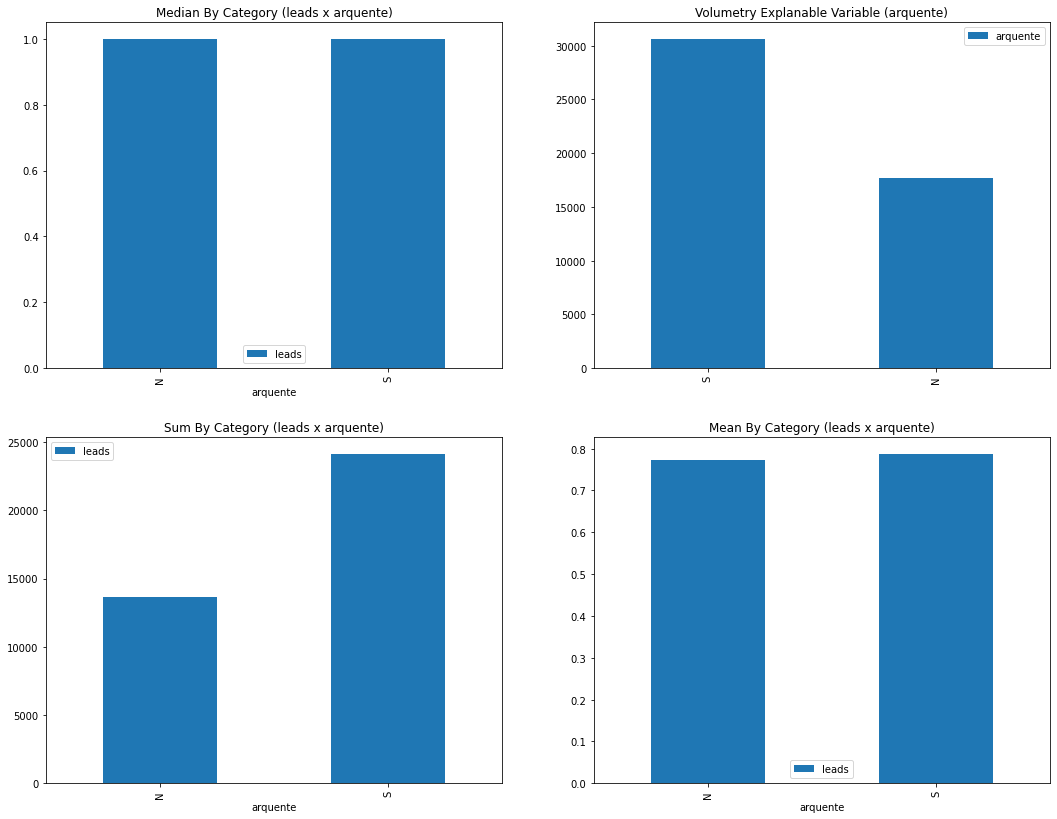

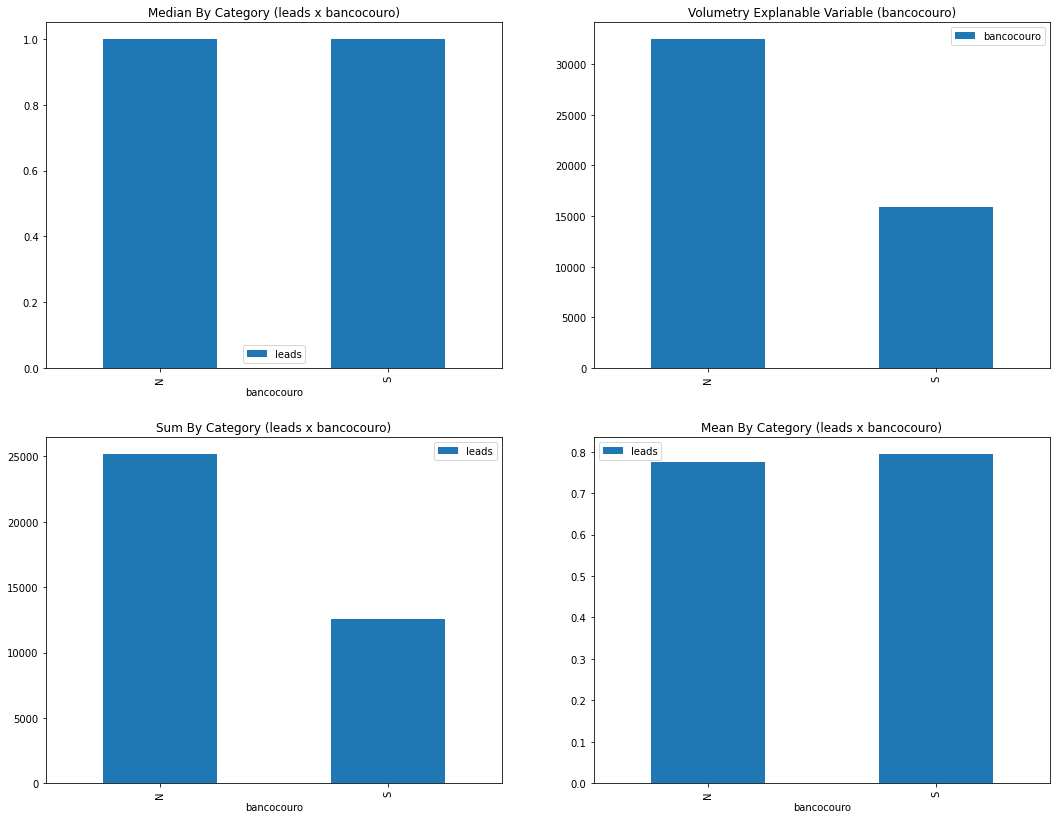

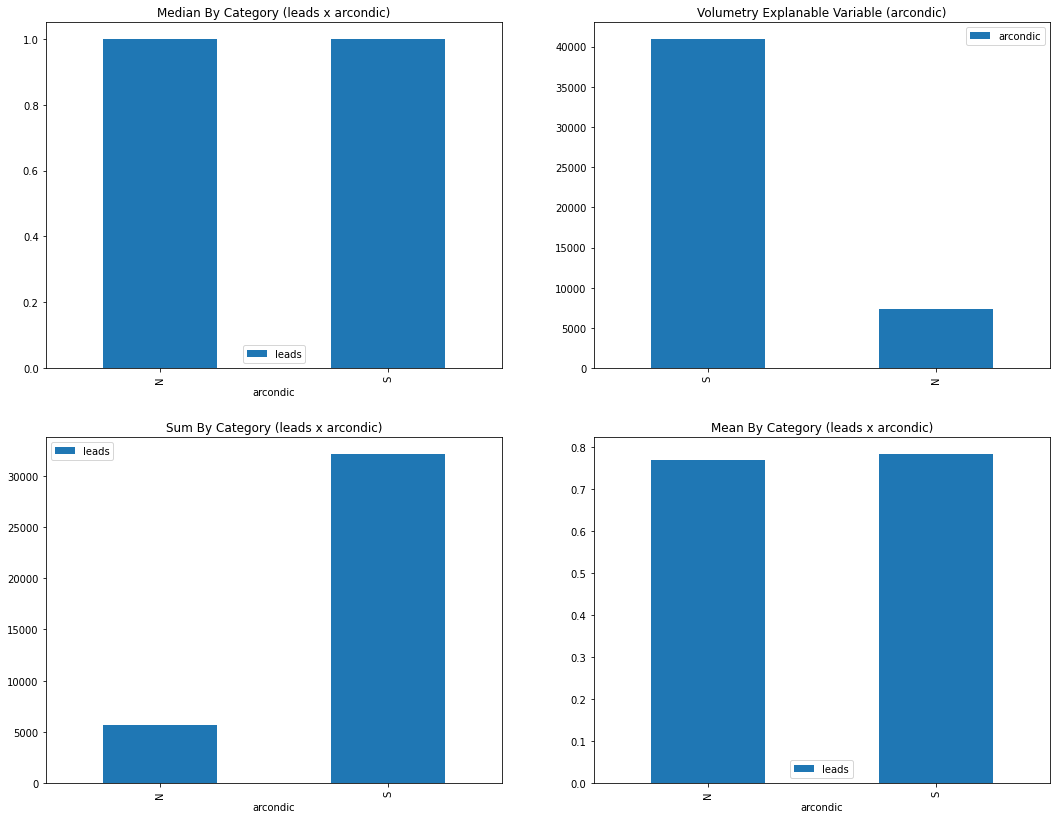

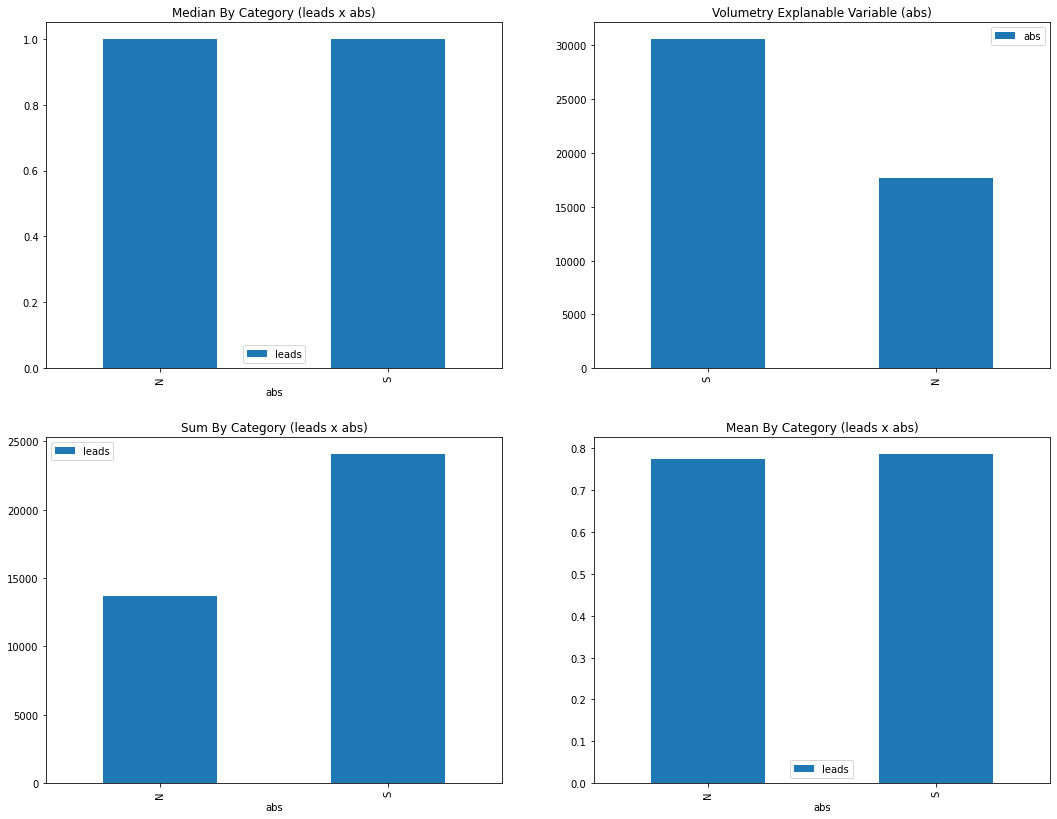

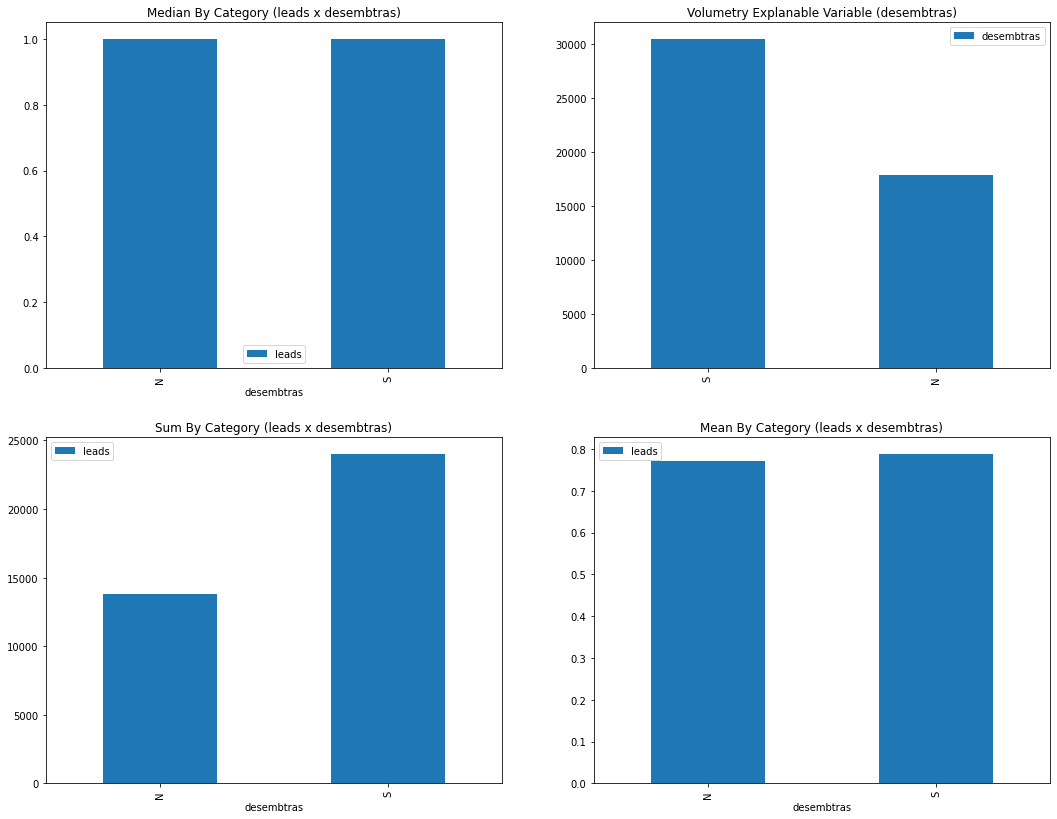

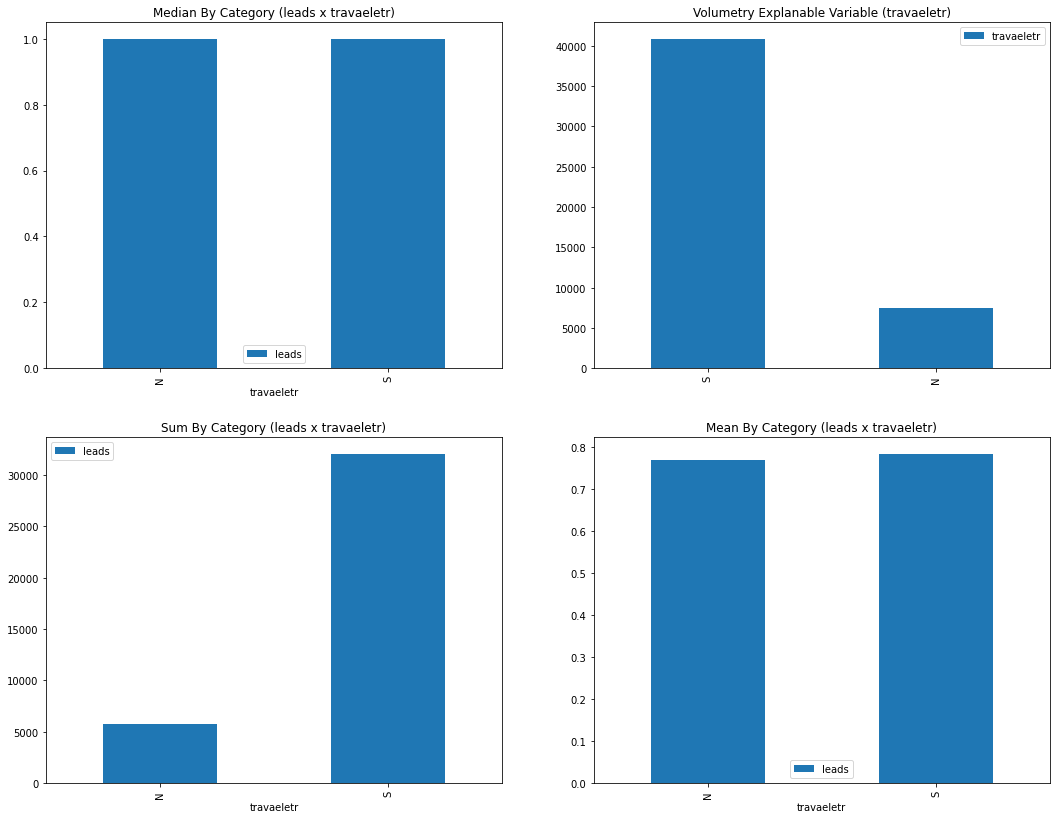

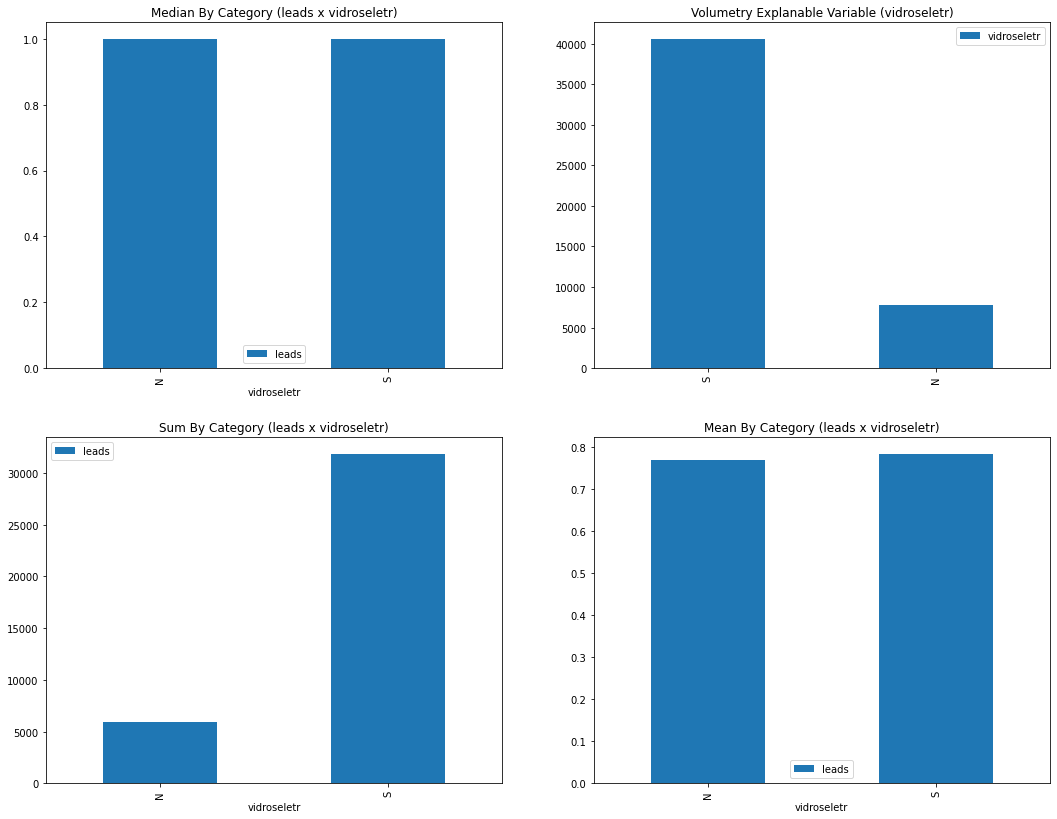

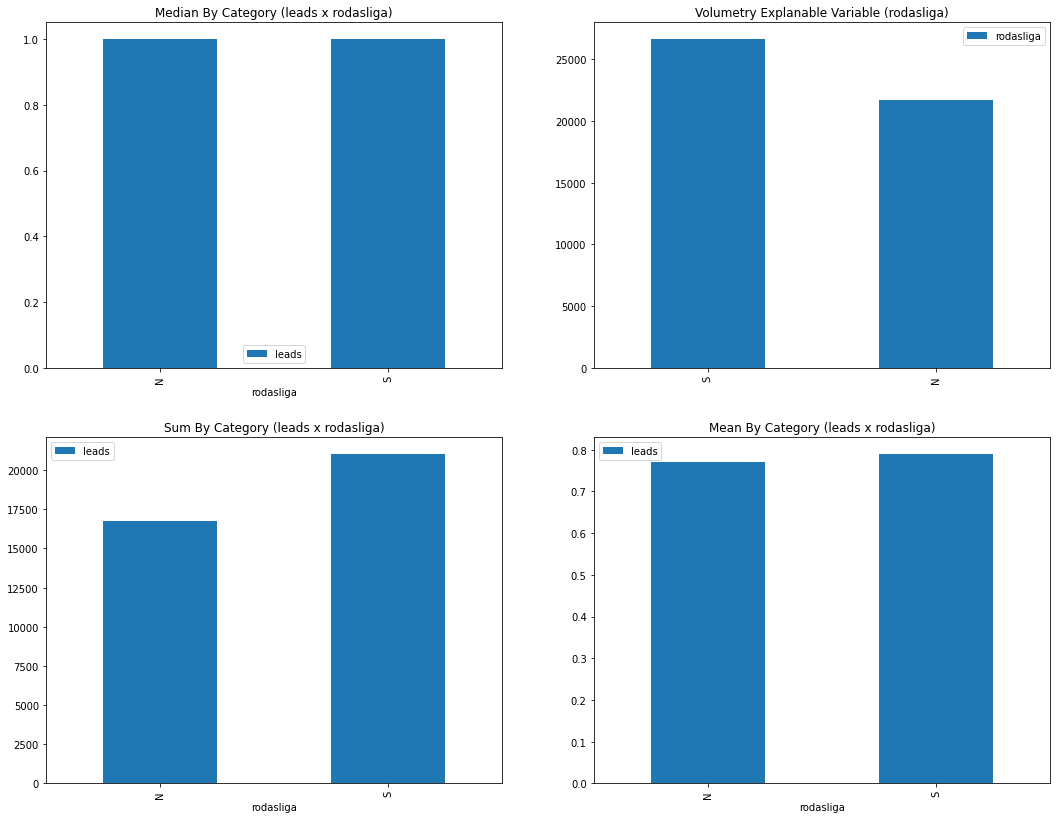

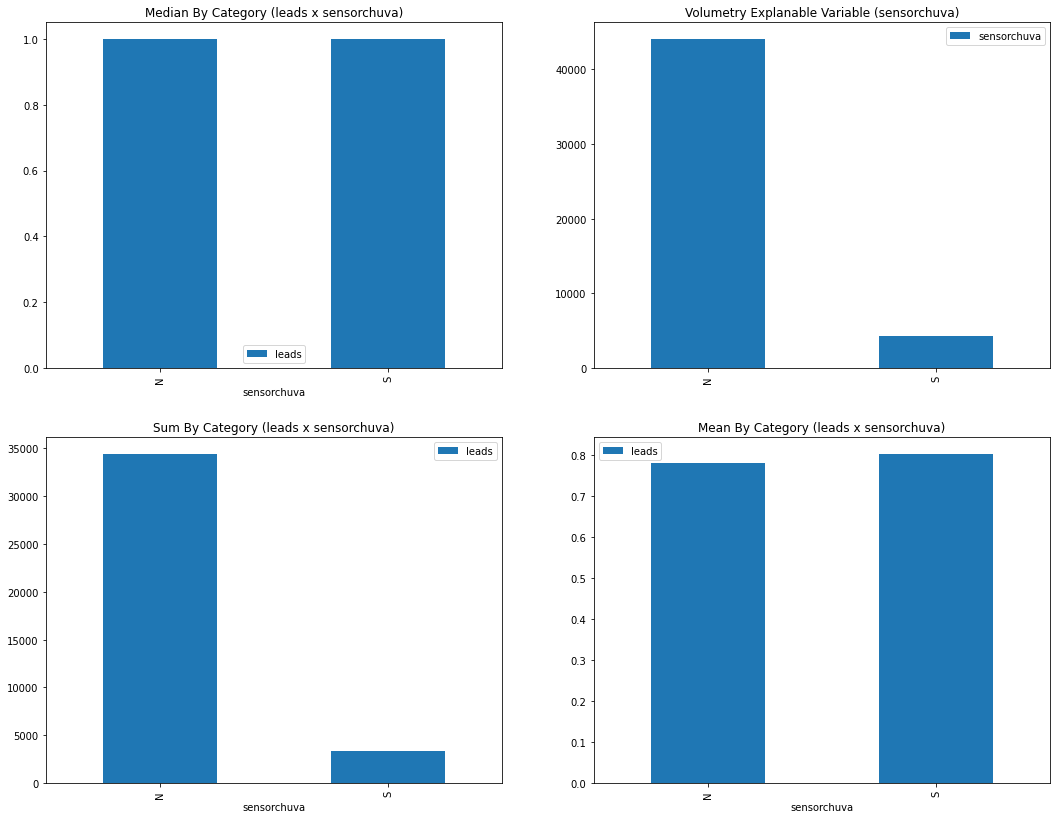

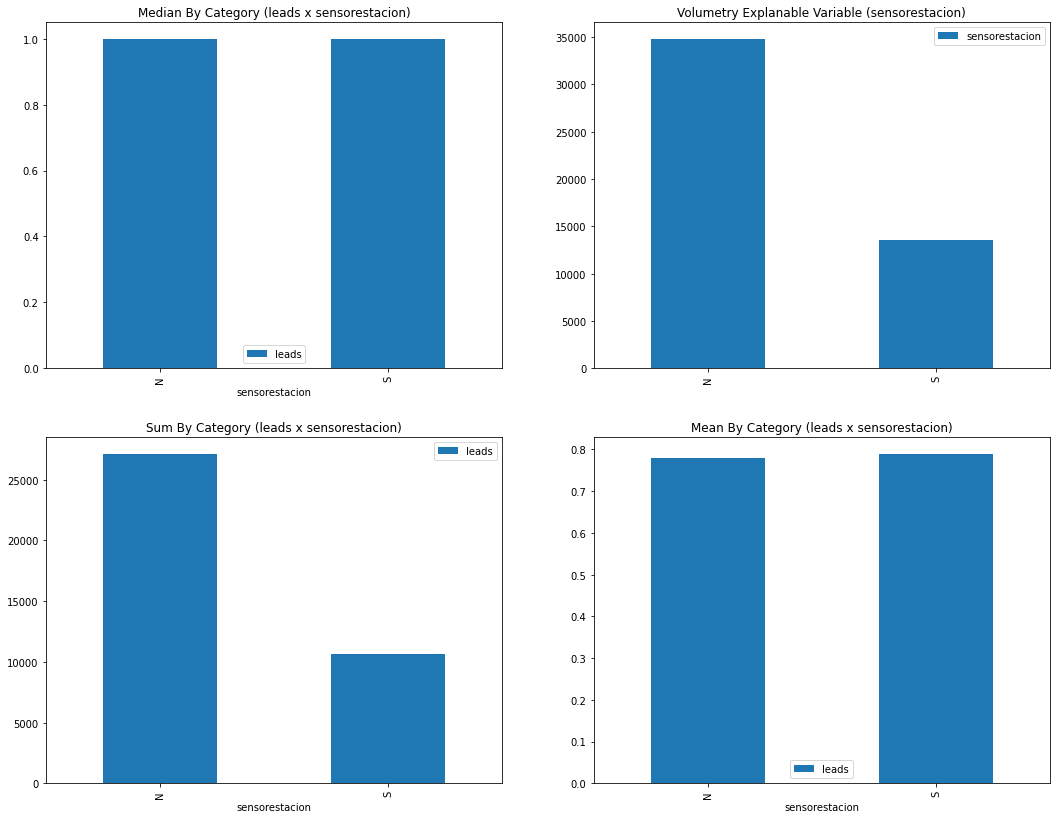

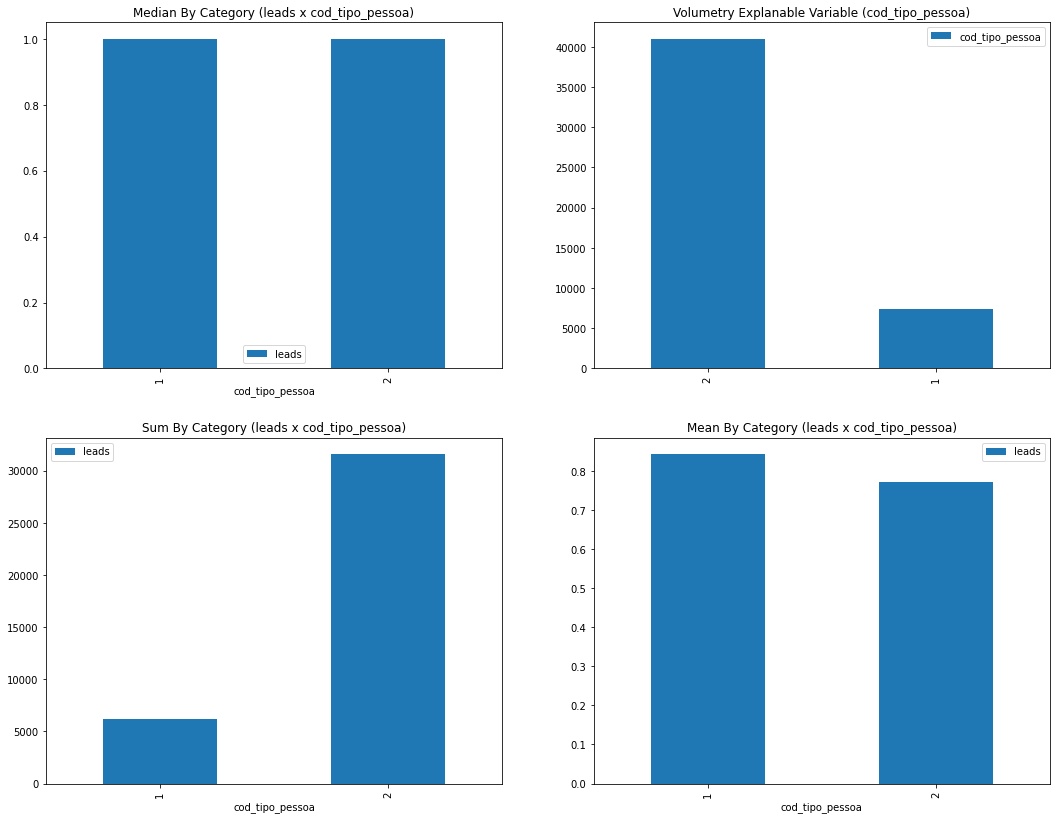

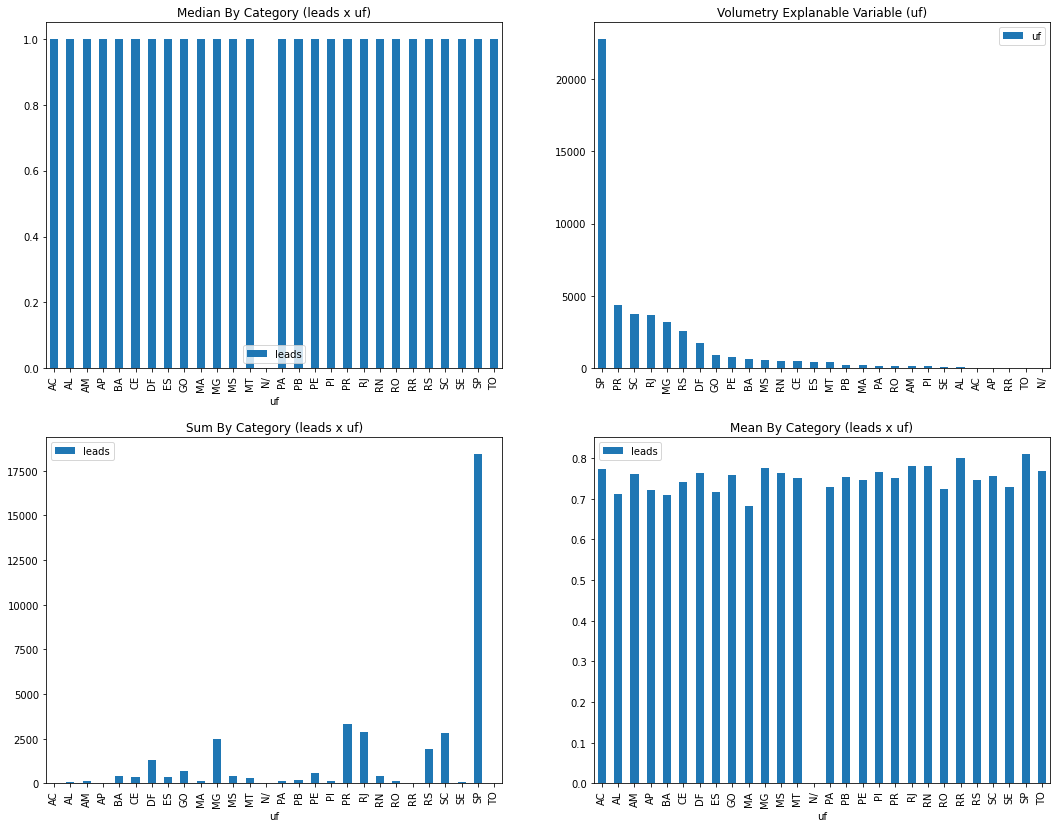

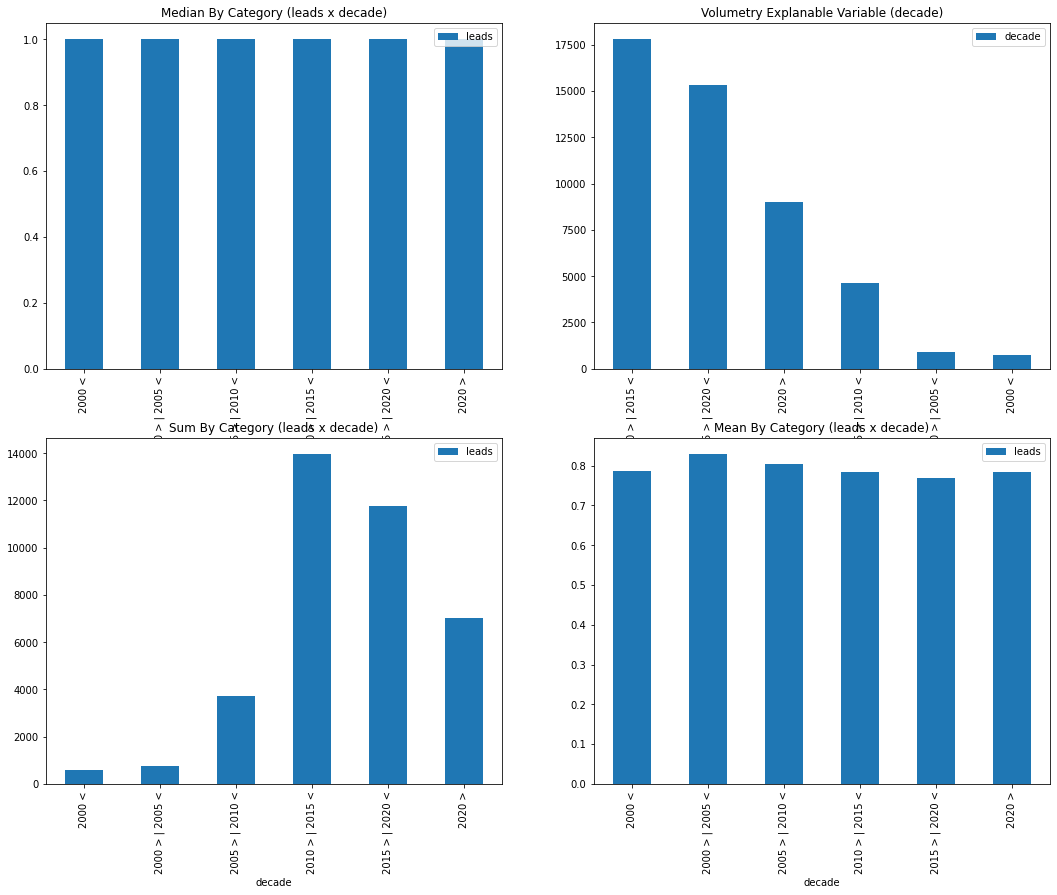

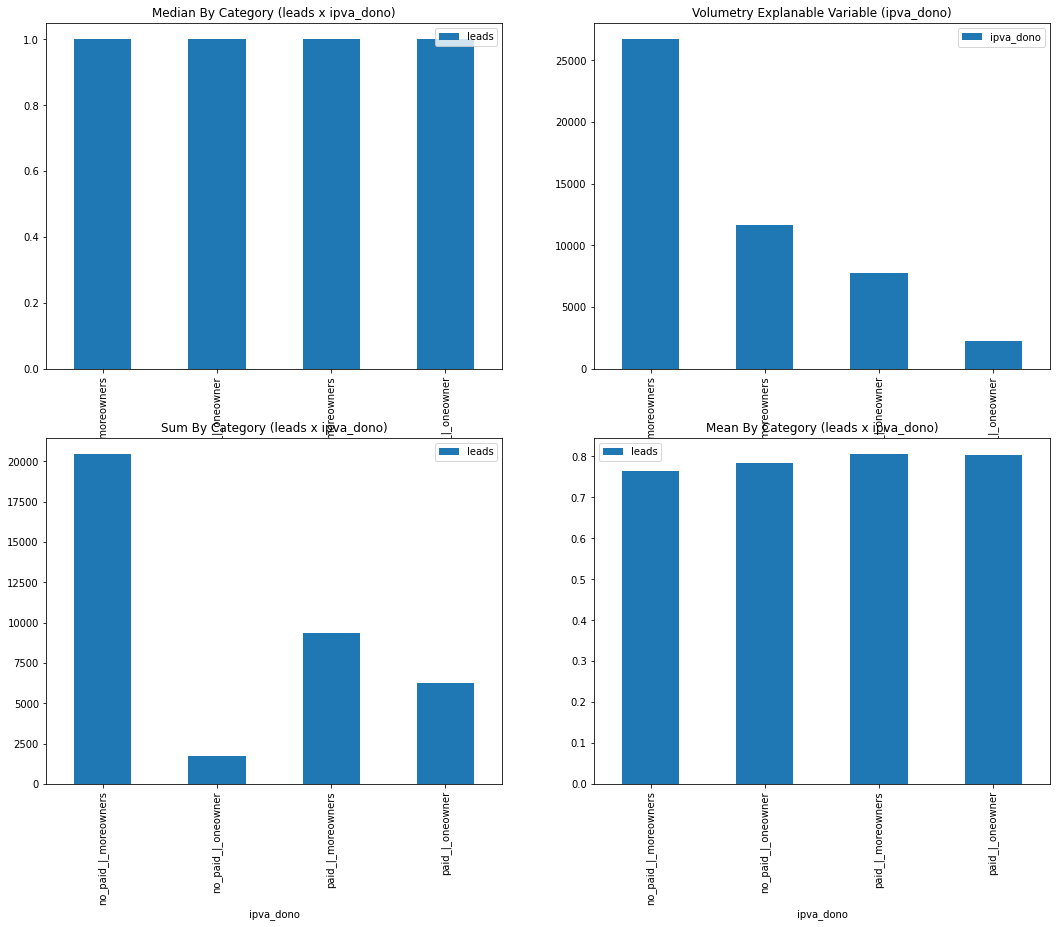

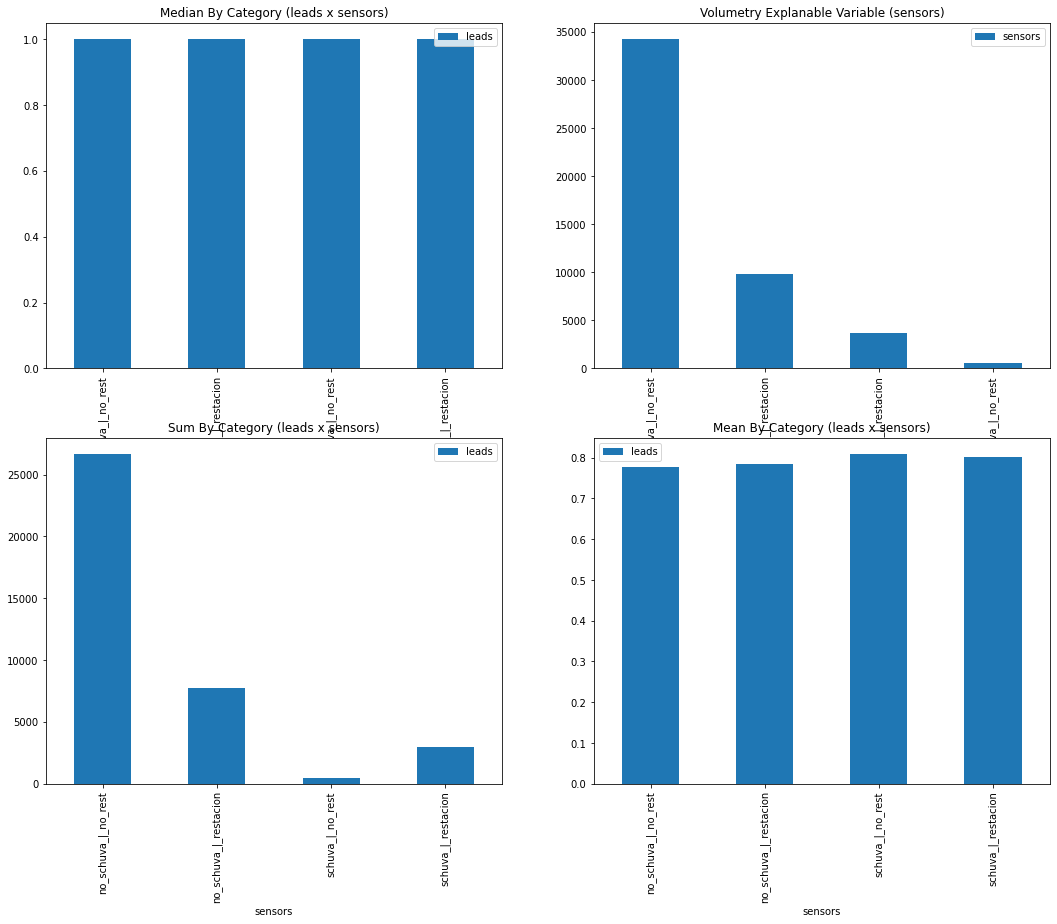

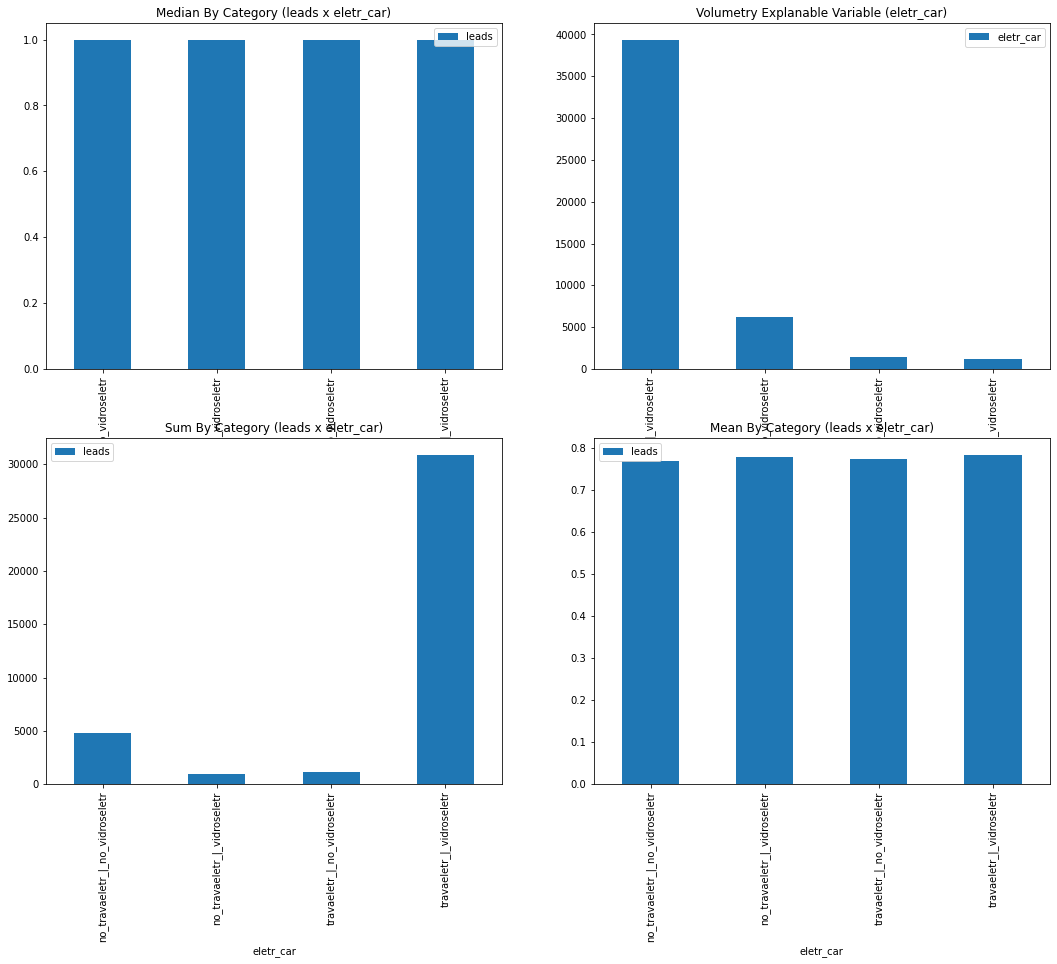

In [31]:
cat_var_analy = PlotCreator(df=df1)

for expl_var in cat_list:
    saving_figloc=(c().reports_fld() / f'classification/{expl_var}_cat_eda.jpg')
    cat_var_analy.plot_cat_analy(res_var='leads', expl_var=expl_var, saving_figloc=saving_figloc)

## 3.3. Special Cases

### Num of Uniques in Special Cases

In [32]:
for s in special_cases_list:
    print(f'Num of unique in {s}: {len(df1[s].unique())}')

Num of unique in cod_cliente: 16236
Num of unique in cep_2dig: 98
Num of unique in uf_cidade: 929
Num of unique in cod_marca_veiculo: 74
Num of unique in cod_modelo_veiculo: 654
Num of unique in cod_versao_veiculo: 4142
Num of unique in ano_modelo: 63


### Dropping Extremaly Cases

In [33]:
# dropping these vars because they are IDs who can't be groupped
# even if this can be put in a model, can't be analyzed with security
# then, for control and explainability, I prefer to drop these columns
# the column "uf_cidade" and "ano_modelo" was treated before and derivated some information from them
drop_vars = ['cod_cliente', 'cod_versao_veiculo', 'cod_modelo_veiculo', 'uf_cidade',
            'cep_2dig', 'ano_modelo']

In [34]:
df1.drop(drop_vars, axis=1, inplace=True)

### Analyzing Special Cases

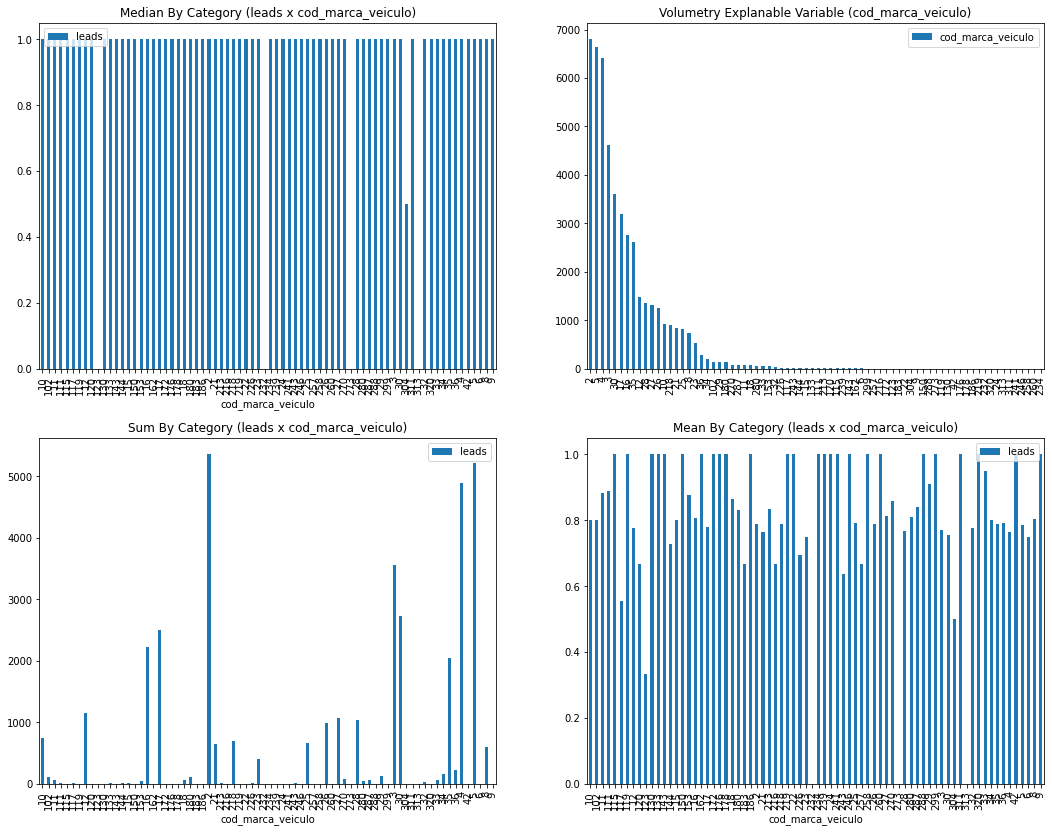

In [35]:
cat_svar_analy = PlotCreator(df=df1.sort_values('cod_marca_veiculo'))
saving_figloc=(c().reports_fld() / f'classification/{expl_var}_cv_eda.jpg')
cat_svar_analy.plot_cat_analy(res_var='leads', expl_var='cod_marca_veiculo', saving_figloc=saving_figloc)

## 3.4. Keeping Cols Based in EDA

In [36]:
# these are the best columns based in EDA Analysis
keep_cols = ['cod_anuncio', 'cliques_telefone*', 'ipva_dono', 
            'flg_aceita_troca', 'views', 'cod_tipo_pessoa', 
            'best_offer', 'leads']
df_prepare = df1[keep_cols]

In [37]:
df_prepare.to_csv(c().data_proc_fld() / 'test_df.csv', index=False)

In [38]:
df_prepare

,cod_anuncio,cliques_telefone*,ipva_dono,flg_aceita_troca,views,cod_tipo_pessoa,best_offer,leads
3,13,14.00,paid_|_moreowners,0,0.00,1,3,1
4,15,11.00,no_paid_|_moreowners,0,0.00,1,3,1
6,21,4.00,paid_|_oneowner,0,0.00,1,3,1
9,31,8.00,paid_|_moreowners,0,0.00,1,3,1
10,32,12.00,paid_|_oneowner,0,0.00,1,3,0
...,...,...,...,...,...,...,...,...
48608,39496,83.00,paid_|_moreowners,1,56.00,1,2,1
48609,39620,53.00,paid_|_moreowners,1,56.00,1,2,1
48611,39761,20.00,paid_|_moreowners,1,56.00,1,2,1
48644,43573,64.00,paid_|_oneowner,0,64.00,1,3,1


# Data Save

In [39]:
joblib.dump(df_prepare, open((c().data_proc_fld() / '01_df_prepared_class.pkl'), 'wb'))